# Market Basket Analysis


**What is Market Basket Analysis ?**

Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items. 
It works by looking for combinations of items that occur together frequently in transactions. To put it another way, it allows retailers to identify relationships between the items that people buy.

# Market Basket Analysis For Foodmart Store Dataset

**About Foodmart**

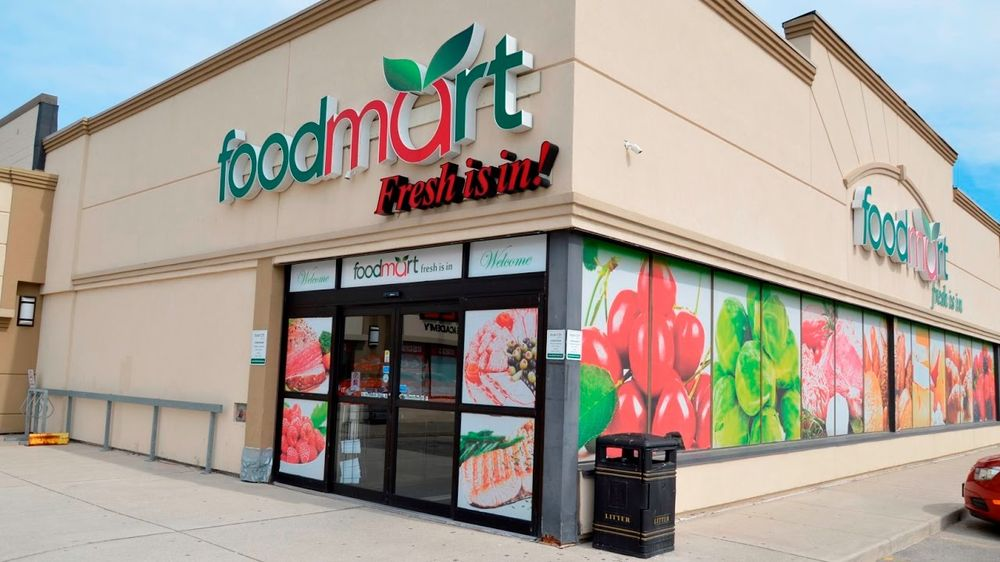

Food Mart (FM) is a chain of convenience stores in the United States. The private company's headquarters are located in Mentor, Ohio, and there are currently approximately **325 stores located in the US**. Food Mart operates on the franchise system.

**Importing Libraries**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
## Get multiple outputs in the same cell
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [3]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

**Loading Customers Dataset**

In [4]:
customer=pd.read_csv("./dataset/customer.csv")

In [5]:
customer.head()

customer_id      city state_province country  customer_region_id  \
0            1  Tlaxiaco         Oaxaca  Mexico                  30   
1            2     Sooke             BC  Canada                 101   
2            3  Issaquah             WA     USA                  21   
3            4   Burnaby             BC  Canada                  92   
4            5    Novato             CA     USA                  42   

  yearly_income gender  total_children  num_children_at_home  \
0   $30K - $50K      F               4                     2   
1   $70K - $90K      M               1                     0   
2   $50K - $70K      F               1                     1   
3   $10K - $30K      M               4                     4   
4   $30K - $50K      F               3                     0   

             education date_accnt_opened member_card      occupation  \
0  Partial High School          10/09/91      Bronze  Skilled Manual   
1  Partial High School          11/03/93      Bronze    Professional   
2     Bachelors Degree          11/06/91      Bronze    Professional   
3  Partial High School          21/05/94      Normal  Skilled Manual   
4      Partial College          21/08/92      Silver          Manual   

  houseowner  num_cars_owned  
0          Y               4  
1          N               3  
2          Y               2  
3          N               2  
4          N               3

**Loading Products Dataset**

In [6]:
product=pd.read_csv("./dataset/product.csv")

In [7]:
product.head()

product_class_id  product_id  brand_name                 product_name  \
0                30           1  Washington       Washington Berry Juice   
1                52           2  Washington       Washington Mango Drink   
2                52           3  Washington  Washington Strawberry Drink   
3                19           4  Washington        Washington Cream Soda   
4                19           5  Washington         Washington Diet Soda   

           SKU   SRP  gross_weight  net_weight  recyclable_package  low_fat  \
0  90748583674  2.85          8.39        6.39                   0        0   
1  96516502499  0.74          7.42        4.42                   0        1   
2  58427771925  0.83         13.10       11.10                   1        1   
3  64412155747  3.64         10.60        9.60                   1        0   
4  85561191439  2.19          6.66        4.65                   1        0   

   units_per_case  cases_per_pallet  shelf_width  shelf_height  shelf_depth  
0              30                14         16.9         12.60         7.40  
1              18                 8         13.4          3.71        22.60  
2              17                13         14.4         11.00         7.77  
3              26                10         22.9         18.90         7.93  
4               7                10         20.7         21.90        19.20

**Loading Departments Dataset**

In [8]:
product_class=pd.read_csv("./dataset/product_class.csv")

In [9]:
product_class.head()

product_class_id   subcategory       category       department family
0                 1          Nuts      Specialty          Produce   Food
1                 2     Shellfish        Seafood          Seafood   Food
2                 3  Canned Fruit          Fruit  Canned Products   Food
3                 4        Spices   Baking Goods     Baking Goods   Food
4                 5         Pasta  Starchy Foods    Starchy Foods   Food

**Loading Region Dataset**

In [10]:
region=pd.read_csv("./dataset/region.csv")

In [11]:
region.head()

region_id     sales_city sales_state_province sales_district  \
0          0           None                 None    No District   
1          1  San Francisco                   CA  San Francisco   
2          2    Mexico City                   DF    Mexico City   
3          3    Los Angeles                   CA    Los Angeles   
4          4    Guadalajara              Jalisco    Guadalajara   

     sales_region sales_country  sales_district_id  
0       No Region    No Country                  0  
1    Central West           USA                123  
2  Mexico Central        Mexico                118  
3      South West           USA                116  
4     Mexico West        Mexico                114

**Loading Sales Dataset**

In [12]:
df=pd.read_csv("./dataset/sales.csv")

In [13]:
df.head()

product_id  time_id  customer_id  store_id  store_sales  store_cost  \
0         337      371         6280         2         1.50      0.5100   
1        1512      371         6280         2         1.62      0.6318   
2         963      371         4018         2         2.40      0.7200   
3         181      371         4018         2         2.79      1.0323   
4        1383      371         4018         2         5.18      2.1756   

   unit_sales  
0           2  
1           3  
2           1  
3           3  
4           2

**Loading Stores Dataset**

In [14]:
store=pd.read_csv("./dataset/store.csv")

In [15]:
store.head()

store_id           store_type  region_id store_name  store_number  \
0         0         HeadQuarters          0         HQ             0   
1         1          Supermarket         28    Store 1             1   
2         2        Small Grocery         78    Store 2             2   
3         3          Supermarket         76    Store 3             3   
4         4  Gourmet Supermarket         27    Store 4             4   

  store_street_address  store_city store_state  store_postal_code  \
0        1 Alameda Way     Alameda          CA              55555   
1       2853 Bailey Rd    Acapulco    Guerrero              55555   
2   5203 Catanzaro Way  Bellingham          WA              55555   
3   1501 Ramsey Circle   Bremerton          WA              55555   
4     433 St George Dr     Camacho   Zacatecas              55555   

  store_country  ... last_remodel_date store_sqft grocery_sqft frozen_sqft  \
0           USA  ...    4/12/1990 0:00      25638        18697        3648   
1        Mexico  ...    5/12/1990 0:00      23593        17475        3671   
2           USA  ...     4/6/1973 0:00      28206        22271        3561   
3           USA  ...   19/11/1967 0:00      39696        24390        9184   
4        Mexico  ...    1/12/1995 0:00      23759        16844        4149   

  meat_sqft  coffee_bar  video_store  salad_bar  prepared_food  florist  
0      3293           0            0          0              0        0  
1      2447           0            0          0              0        0  
2      2374           1            0          0              0        0  
3      6122           0            0          1              1        0  
4      2766           1            0          1              1        1  

[5 rows x 24 columns]

**Loading Time by Day Dataset**

In [16]:
time_by_day=pd.read_csv("./dataset/time_by_day.csv")

In [17]:
time_by_day.head()

time_id    the_date    the_day  the_year  the_month  day_of_month  \
0        1  1996-01-01     Monday      1996          1             1   
1        2  1996-01-02    Tuesday      1996          1             2   
2        3  1996-01-03  Wednesday      1996          1             3   
3        4  1996-01-04   Thursday      1996          1             4   
4        5  1996-01-05     Friday      1996          1             5   

   day_since_epoch  
0            33603  
1            33604  
2            33605  
3            33606  
4            33607

In [18]:
time_by_day.tail()

time_id    the_date    the_day  the_year  the_month  day_of_month  \
1456     1457  1999-12-27     Monday      1999         12            27   
1457     1458  1999-12-28    Tuesday      1999         12            28   
1458     1459  1999-12-29  Wednesday      1999         12            29   
1459     1460  1999-12-30   Thursday      1999         12            30   
1460     1461  1999-12-31     Friday      1999         12            31   

      day_since_epoch  
1456            35059  
1457            35060  
1458            35061  
1459            35062  
1460            35063

**Merging Customer Dataset in df Dataframe**

In [19]:
df=df.merge(customer,on='customer_id')

In [20]:
df.head()

product_id  time_id  customer_id  store_id  store_sales  store_cost  \
0         337      371         6280         2         1.50      0.5100   
1        1512      371         6280         2         1.62      0.6318   
2         963      371         4018         2         2.40      0.7200   
3         181      371         4018         2         2.79      1.0323   
4        1383      371         4018         2         5.18      2.1756   

   unit_sales           city state_province country  ...  yearly_income  \
0           2      Anacortes             WA     USA  ...    $30K - $50K   
1           3      Anacortes             WA     USA  ...    $30K - $50K   
2           1  Sedro Woolley             WA     USA  ...   $90K - $110K   
3           3  Sedro Woolley             WA     USA  ...   $90K - $110K   
4           2  Sedro Woolley             WA     USA  ...   $90K - $110K   

  gender total_children  num_children_at_home            education  \
0      F              5                     0   High School Degree   
1      F              5                     0   High School Degree   
2      F              4                     0  Partial High School   
3      F              4                     0  Partial High School   
4      F              4                     0  Partial High School   

  date_accnt_opened member_card      occupation houseowner num_cars_owned  
0          14/01/93      Bronze  Skilled Manual          Y              3  
1          14/01/93      Bronze  Skilled Manual          Y              3  
2          07/05/92      Silver      Management          Y              2  
3          07/05/92      Silver      Management          Y              2  
4          07/05/92      Silver      Management          Y              2  

[5 rows x 21 columns]

**Merging Products Dataset in df Dataframe**

In [21]:
df=df.merge(product,on='product_id')

In [22]:
df.head()

product_id  time_id  customer_id  store_id  store_sales  store_cost  \
0         337      371         6280         2         1.50      0.5100   
1         337      987         5713         2         0.75      0.2775   
2         337      826         7413         3         2.25      1.1025   
3         337      765         1005         3         3.00      1.1400   
4         337      829         4998         3         2.25      1.1250   

   unit_sales          city state_province country  ...   SRP gross_weight  \
0           2     Anacortes             WA     USA  ...  0.75         8.34   
1           1     Anacortes             WA     USA  ...  0.75         8.34   
2           3     Bremerton             WA     USA  ...  0.75         8.34   
3           4     Bremerton             WA     USA  ...  0.75         8.34   
4           3  Port Orchard             WA     USA  ...  0.75         8.34   

  net_weight  recyclable_package  low_fat units_per_case cases_per_pallet  \
0       7.34                   1        1              9               10   
1       7.34                   1        1              9               10   
2       7.34                   1        1              9               10   
3       7.34                   1        1              9               10   
4       7.34                   1        1              9               10   

  shelf_width shelf_height shelf_depth  
0        18.4         21.6        4.76  
1        18.4         21.6        4.76  
2        18.4         21.6        4.76  
3        18.4         21.6        4.76  
4        18.4         21.6        4.76  

[5 rows x 35 columns]

**Merging Department Dataset in df Dataframe**

In [23]:
df=df.merge(product_class,on='product_class_id')

In [24]:
df.head()

product_id  time_id  customer_id  store_id  store_sales  store_cost  \
0         337      371         6280         2         1.50      0.5100   
1         337      987         5713         2         0.75      0.2775   
2         337      826         7413         3         2.25      1.1025   
3         337      765         1005         3         3.00      1.1400   
4         337      829         4998         3         2.25      1.1250   

   unit_sales          city state_province country  ...  low_fat  \
0           2     Anacortes             WA     USA  ...        1   
1           1     Anacortes             WA     USA  ...        1   
2           3     Bremerton             WA     USA  ...        1   
3           4     Bremerton             WA     USA  ...        1   
4           3  Port Orchard             WA     USA  ...        1   

  units_per_case cases_per_pallet  shelf_width  shelf_height shelf_depth  \
0              9               10         18.4          21.6        4.76   
1              9               10         18.4          21.6        4.76   
2              9               10         18.4          21.6        4.76   
3              9               10         18.4          21.6        4.76   
4              9               10         18.4          21.6        4.76   

  subcategory     category    department family  
0        Soup  Canned Soup  Canned Foods   Food  
1        Soup  Canned Soup  Canned Foods   Food  
2        Soup  Canned Soup  Canned Foods   Food  
3        Soup  Canned Soup  Canned Foods   Food  
4        Soup  Canned Soup  Canned Foods   Food  

[5 rows x 39 columns]

**Merging Stores Dataset in df Dataframe**

In [25]:
df=df.merge(store,on='store_id')

In [26]:
df.head()

product_id  time_id  customer_id  store_id  store_sales  store_cost  \
0         337      371         6280         2         1.50      0.5100   
1         337      987         5713         2         0.75      0.2775   
2         337      742          307         2         2.25      0.7425   
3         963      371         4018         2         2.40      0.7200   
4         963      952         5121         2         2.40      1.1040   

   unit_sales           city state_province country  ...  last_remodel_date  \
0           2      Anacortes             WA     USA  ...      4/6/1973 0:00   
1           1      Anacortes             WA     USA  ...      4/6/1973 0:00   
2           3  Sedro Woolley             WA     USA  ...      4/6/1973 0:00   
3           1  Sedro Woolley             WA     USA  ...      4/6/1973 0:00   
4           1     Bellingham             WA     USA  ...      4/6/1973 0:00   

  store_sqft grocery_sqft  frozen_sqft  meat_sqft coffee_bar video_store  \
0      28206        22271         3561       2374          1           0   
1      28206        22271         3561       2374          1           0   
2      28206        22271         3561       2374          1           0   
3      28206        22271         3561       2374          1           0   
4      28206        22271         3561       2374          1           0   

  salad_bar prepared_food florist  
0         0             0       0  
1         0             0       0  
2         0             0       0  
3         0             0       0  
4         0             0       0  

[5 rows x 62 columns]

**Merging Region Dataset in df Dataframe**

In [27]:
df=df.merge(region,on='region_id')

In [28]:
df.head()

product_id  time_id  customer_id  store_id  store_sales  store_cost  \
0         337      371         6280         2         1.50      0.5100   
1         337      987         5713         2         0.75      0.2775   
2         337      742          307         2         2.25      0.7425   
3         963      371         4018         2         2.40      0.7200   
4         963      952         5121         2         2.40      1.1040   

   unit_sales           city state_province country  ...  video_store  \
0           2      Anacortes             WA     USA  ...            0   
1           1      Anacortes             WA     USA  ...            0   
2           3  Sedro Woolley             WA     USA  ...            0   
3           1  Sedro Woolley             WA     USA  ...            0   
4           1     Bellingham             WA     USA  ...            0   

  salad_bar prepared_food  florist  sales_city sales_state_province  \
0         0             0        0  Bellingham                   WA   
1         0             0        0  Bellingham                   WA   
2         0             0        0  Bellingham                   WA   
3         0             0        0  Bellingham                   WA   
4         0             0        0  Bellingham                   WA   

  sales_district sales_region sales_country sales_district_id  
0     Bellingham   North West           USA               111  
1     Bellingham   North West           USA               111  
2     Bellingham   North West           USA               111  
3     Bellingham   North West           USA               111  
4     Bellingham   North West           USA               111  

[5 rows x 68 columns]

**Merging Time by Day Dataset in df Dataframe**

In [29]:
df=df.merge(time_by_day,on='time_id')

In [30]:
df.head()

product_id  time_id  customer_id  store_id  store_sales  store_cost  \
0         337      371         6280         2         1.50      0.5100   
1         963      371         4018         2         2.40      0.7200   
2        1512      371         6280         2         1.62      0.6318   
3         181      371         4018         2         2.79      1.0323   
4         483      371         4382         2         3.88      1.7072   

   unit_sales           city state_province country  ...  sales_district  \
0           2      Anacortes             WA     USA  ...      Bellingham   
1           1  Sedro Woolley             WA     USA  ...      Bellingham   
2           3      Anacortes             WA     USA  ...      Bellingham   
3           3  Sedro Woolley             WA     USA  ...      Bellingham   
4           2      Anacortes             WA     USA  ...      Bellingham   

  sales_region sales_country  sales_district_id    the_date the_day the_year  \
0   North West           USA                111  1997-01-05  Sunday     1997   
1   North West           USA                111  1997-01-05  Sunday     1997   
2   North West           USA                111  1997-01-05  Sunday     1997   
3   North West           USA                111  1997-01-05  Sunday     1997   
4   North West           USA                111  1997-01-05  Sunday     1997   

  the_month day_of_month day_since_epoch  
0         1            5           33973  
1         1            5           33973  
2         1            5           33973  
3         1            5           33973  
4         1            5           33973  

[5 rows x 74 columns]

**Converting Dataframe to Final Foodmart Offline Dataset**

### Merged all the datasets to one

In [31]:
df.to_csv("./dataset/Foodmart_dataset.csv")

# Exploratory Data Analysis (EDA)

**Importing Libraries**

In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import squarify
import networkx as nx
import warnings
import matplotlib as mpl
# import gapminder as gapminder


%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

**Loading Foodmart Offline Dataset**

In [33]:
df=pd.read_csv("./dataset/Foodmart_dataset.csv")

**Size of Foodmart Dataset**

In [34]:
df.shape

(269720, 75)

In [35]:
df.head()

Unnamed: 0  product_id  time_id  customer_id  store_id  store_sales  \
0           0         337      371         6280         2         1.50   
1           1         963      371         4018         2         2.40   
2           2        1512      371         6280         2         1.62   
3           3         181      371         4018         2         2.79   
4           4         483      371         4382         2         3.88   

   store_cost  unit_sales           city state_province  ... sales_district  \
0      0.5100           2      Anacortes             WA  ...     Bellingham   
1      0.7200           1  Sedro Woolley             WA  ...     Bellingham   
2      0.6318           3      Anacortes             WA  ...     Bellingham   
3      1.0323           3  Sedro Woolley             WA  ...     Bellingham   
4      1.7072           2      Anacortes             WA  ...     Bellingham   

   sales_region sales_country sales_district_id    the_date  the_day the_year  \
0    North West           USA               111  1997-01-05   Sunday     1997   
1    North West           USA               111  1997-01-05   Sunday     1997   
2    North West           USA               111  1997-01-05   Sunday     1997   
3    North West           USA               111  1997-01-05   Sunday     1997   
4    North West           USA               111  1997-01-05   Sunday     1997   

  the_month day_of_month day_since_epoch  
0         1            5           33973  
1         1            5           33973  
2         1            5           33973  
3         1            5           33973  
4         1            5           33973  

[5 rows x 75 columns]

# Data Exploration

**Describe**

In [36]:
df.describe()

Unnamed: 0     product_id        time_id    customer_id  \
count  269720.00000  269720.000000  269720.000000  269720.000000   
mean   134859.50000     783.862873     800.004990    5119.390405   
std     77861.60164     447.926131     201.955563    2901.883077   
min         0.00000       1.000000     367.000000       3.000000   
25%     67429.75000     396.000000     657.000000    2570.000000   
50%    134859.50000     787.000000     830.000000    5090.000000   
75%    202289.25000    1174.000000     968.000000    7614.000000   
max    269719.00000    1559.000000    1095.000000   10281.000000   

            store_id    store_sales     store_cost     unit_sales  \
count  269720.000000  269720.000000  269720.000000  269720.000000   
mean       12.753730       6.542142       2.618622       3.090201   
std         6.349746       3.461318       1.452805       0.835554   
min         1.000000       0.500000       0.153000       1.000000   
25%         7.000000       3.810000       1.498000       3.000000   
50%        13.000000       5.940000       2.386500       3.000000   
75%        17.000000       8.670000       3.486000       4.000000   
max        24.000000      23.640000      10.290000       6.000000   

       customer_region_id  total_children  ...     coffee_bar    video_store  \
count       269720.000000   269720.000000  ...  269720.000000  269720.000000   
mean            57.723454        2.535351  ...       0.623484       0.295265   
std             29.973844        1.490679  ...       0.484513       0.456163   
min              1.000000        0.000000  ...       0.000000       0.000000   
25%             26.000000        1.000000  ...       0.000000       0.000000   
50%             66.000000        3.000000  ...       1.000000       0.000000   
75%             85.000000        4.000000  ...       1.000000       1.000000   
max            109.000000        5.000000  ...       1.000000       1.000000   

           salad_bar  prepared_food        florist  sales_district_id  \
count  269720.000000  269720.000000  269720.000000      269720.000000   
mean        0.614471       0.553111       0.594839         120.811319   
std         0.486721       0.497172       0.490924           6.222520   
min         0.000000       0.000000       0.000000         110.000000   
25%         0.000000       0.000000       0.000000         116.000000   
50%         1.000000       1.000000       1.000000         120.000000   
75%         1.000000       1.000000       1.000000         125.000000   
max         1.000000       1.000000       1.000000         133.000000   

            the_year      the_month   day_of_month  day_since_epoch  
count  269720.000000  269720.000000  269720.000000    269720.000000  
mean     1997.678048       6.661100      15.109970     34402.004990  
std         0.467226       3.514326       8.319021       201.955563  
min      1997.000000       1.000000       1.000000     33969.000000  
25%      1997.000000       4.000000       8.000000     34259.000000  
50%      1998.000000       7.000000      15.000000     34432.000000  
75%      1998.000000      10.000000      22.000000     34570.000000  
max      1998.000000      12.000000      30.000000     34697.000000  

[8 rows x 41 columns]

In [37]:
df.describe(include='all')

Unnamed: 0     product_id        time_id    customer_id  \
count   269720.00000  269720.000000  269720.000000  269720.000000   
unique           NaN            NaN            NaN            NaN   
top              NaN            NaN            NaN            NaN   
freq             NaN            NaN            NaN            NaN   
mean    134859.50000     783.862873     800.004990    5119.390405   
std      77861.60164     447.926131     201.955563    2901.883077   
min          0.00000       1.000000     367.000000       3.000000   
25%      67429.75000     396.000000     657.000000    2570.000000   
50%     134859.50000     787.000000     830.000000    5090.000000   
75%     202289.25000    1174.000000     968.000000    7614.000000   
max     269719.00000    1559.000000    1095.000000   10281.000000   

             store_id    store_sales     store_cost     unit_sales     city  \
count   269720.000000  269720.000000  269720.000000  269720.000000   269720   
unique            NaN            NaN            NaN            NaN      107   
top               NaN            NaN            NaN            NaN  Hidalgo   
freq              NaN            NaN            NaN            NaN    16684   
mean        12.753730       6.542142       2.618622       3.090201      NaN   
std          6.349746       3.461318       1.452805       0.835554      NaN   
min          1.000000       0.500000       0.153000       1.000000      NaN   
25%          7.000000       3.810000       1.498000       3.000000      NaN   
50%         13.000000       5.940000       2.386500       3.000000      NaN   
75%         17.000000       8.670000       3.486000       4.000000      NaN   
max         24.000000      23.640000      10.290000       6.000000      NaN   

       state_province  ... sales_district  sales_region sales_country  \
count          269720  ...         269720        269720        269720   
unique             12  ...             21             7             3   
top                WA  ...    Los Angeles    North West           USA   
freq            86855  ...          31501        130006        180823   
mean              NaN  ...            NaN           NaN           NaN   
std               NaN  ...            NaN           NaN           NaN   
min               NaN  ...            NaN           NaN           NaN   
25%               NaN  ...            NaN           NaN           NaN   
50%               NaN  ...            NaN           NaN           NaN   
75%               NaN  ...            NaN           NaN           NaN   
max               NaN  ...            NaN           NaN           NaN   

       sales_district_id    the_date   the_day       the_year      the_month  \
count      269720.000000      269720    269720  269720.000000  269720.000000   
unique               NaN         673         7            NaN            NaN   
top                  NaN  1998-12-07  Thursday            NaN            NaN   
freq                 NaN        1377     40685            NaN            NaN   
mean          120.811319         NaN       NaN    1997.678048       6.661100   
std             6.222520         NaN       NaN       0.467226       3.514326   
min           110.000000         NaN       NaN    1997.000000       1.000000   
25%           116.000000         NaN       NaN    1997.000000       4.000000   
50%           120.000000         NaN       NaN    1998.000000       7.000000   
75%           125.000000         NaN       NaN    1998.000000      10.000000   
max           133.000000         NaN       NaN    1998.000000      12.000000   

         day_of_month day_since_epoch  
count   269720.000000   269720.000000  
unique            NaN             NaN  
top               NaN             NaN  
freq              NaN             NaN  
mean        15.109970    34402.004990  
std          8.319021      201.955563  
min          1.000000    33969.000000  
25%          8.000000    34259.000000  
50%         15.000000    34432.000

**Missing Values**

In [38]:
df.isnull().sum()

Unnamed: 0         0
product_id         0
time_id            0
customer_id        0
store_id           0
                  ..
the_day            0
the_year           0
the_month          0
day_of_month       0
day_since_epoch    0
Length: 75, dtype: int64

**Datatypes**

In [39]:
df.dtypes

Unnamed: 0          int64
product_id          int64
time_id             int64
customer_id         int64
store_id            int64
                    ...  
the_day            object
the_year            int64
the_month           int64
day_of_month        int64
day_since_epoch     int64
Length: 75, dtype: object

**Checking Datatypes, Mising Value, Unique Value**

In [40]:
temp = pd.DataFrame(index=df.columns)
temp['data_type']=df.dtypes
temp['null_count']=df.isnull().sum()
temp['unique_count']=df.nunique()

In [41]:
temp

data_type  null_count  unique_count
Unnamed: 0          int64           0        269720
product_id          int64           0          1559
time_id             int64           0           673
customer_id         int64           0          8842
store_id            int64           0            24
...                   ...         ...           ...
the_day            object           0             7
the_year            int64           0             2
the_month           int64           0            12
day_of_month        int64           0            30
day_since_epoch     int64           0           673

[75 rows x 3 columns]

# Univariate Analysis 

**Histograms**

**Frequency Plot Of Department Id**

Text(0.5, 0, 'department id')

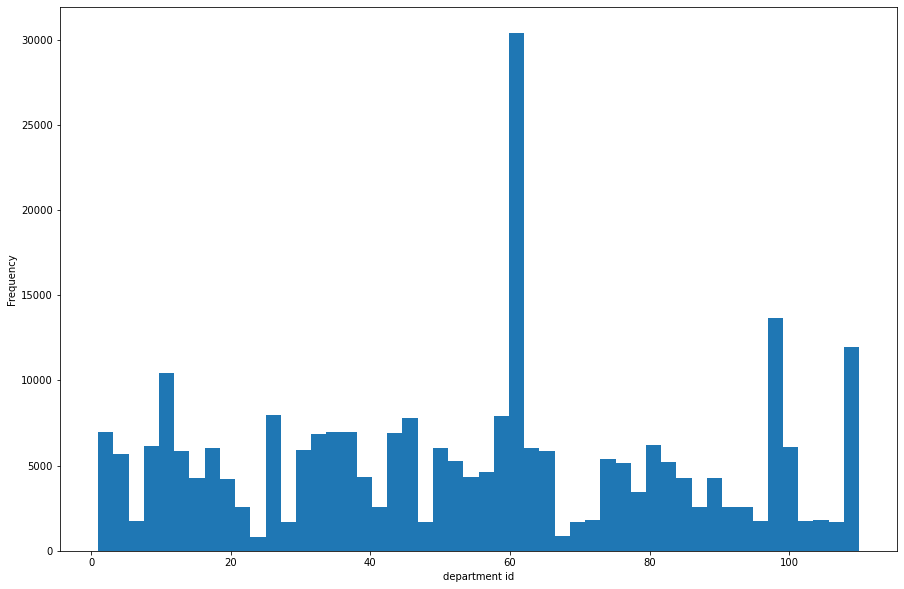

In [42]:
fig=plt.figure(figsize=(15,10))
df['product_class_id'].plot.hist(bins = 50)
plt.xlabel('department id')

**Frequency Plot Of Product Id**

Text(0.5, 0, 'product id')

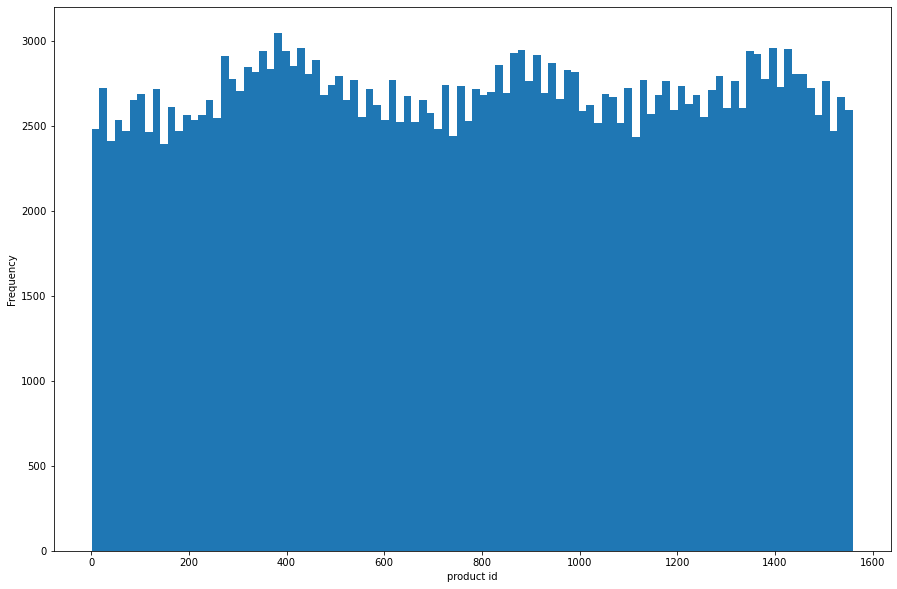

In [43]:
fig=plt.figure(figsize=(15,10))
df['product_id'].plot.hist(bins = 100)
plt.xlabel('product id')

**Frequency Plot Of Unit Sales**

Text(0.5, 0, 'Unit Sales')

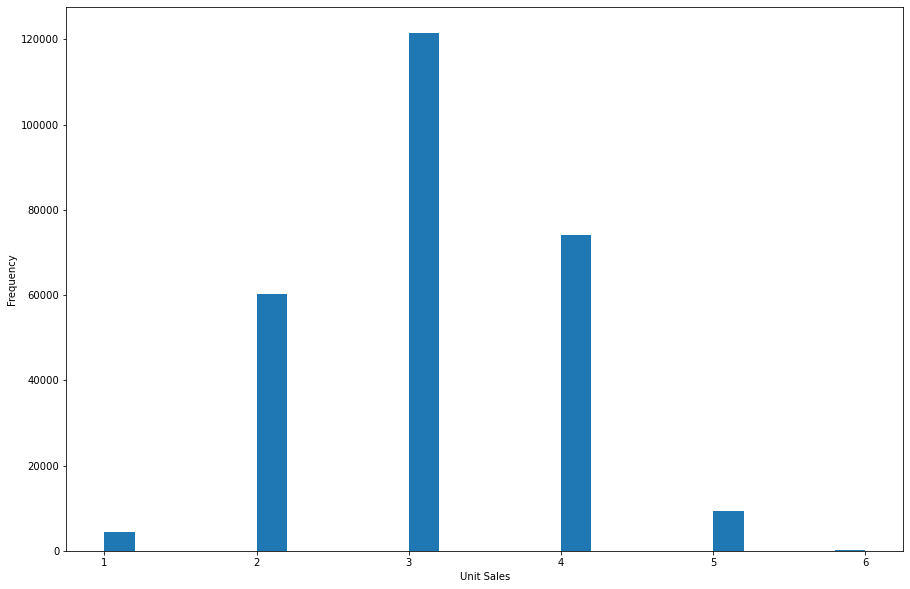

In [44]:
fig=plt.figure(figsize=(15,10))
df['unit_sales'].plot.hist(bins = 25)
plt.xlabel('Unit Sales')

**When do people order**

**Year**

([<matplotlib.axis.XTick at 0x2588754a2c0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

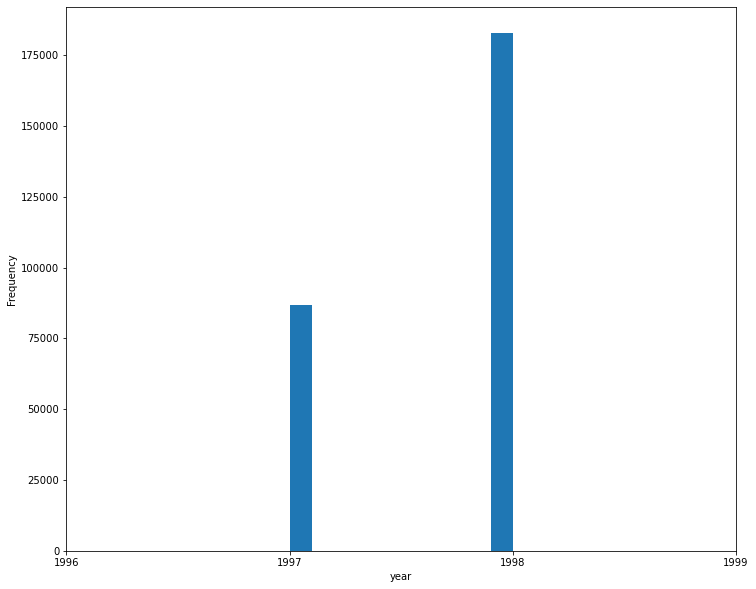

In [45]:
fig=plt.figure(figsize=(12,10))
df['the_year'].plot.hist(bins=10)
plt.xlabel('year')
plt.xticks([1996,1997,1998,1999])

**Month**

Text(0.5, 0, 'Month')

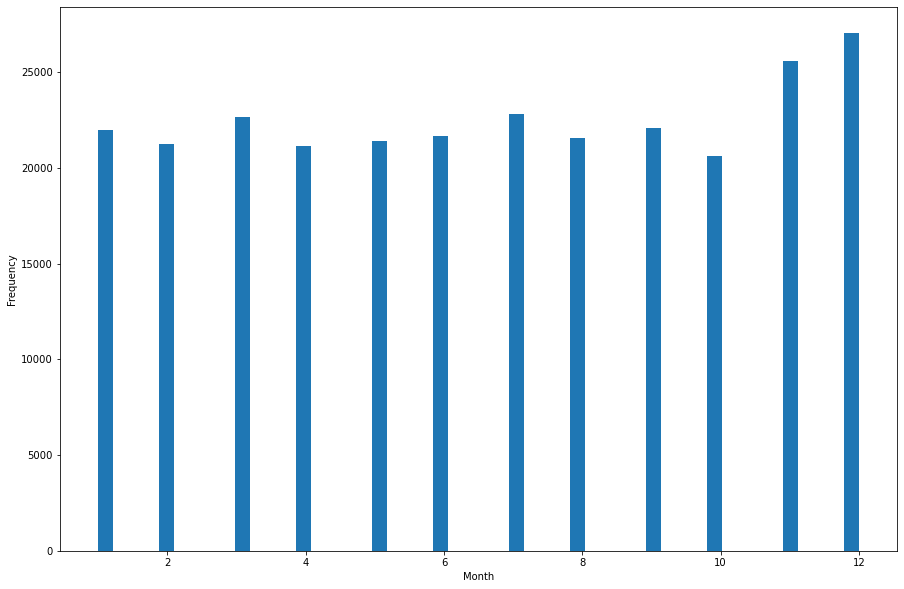

In [46]:
fig=plt.figure(figsize=(15,10))
df['the_month'].plot.hist(bins=50)
plt.xlabel('Month')

**Day Of Month**

Text(0.5, 0, 'Day of month')

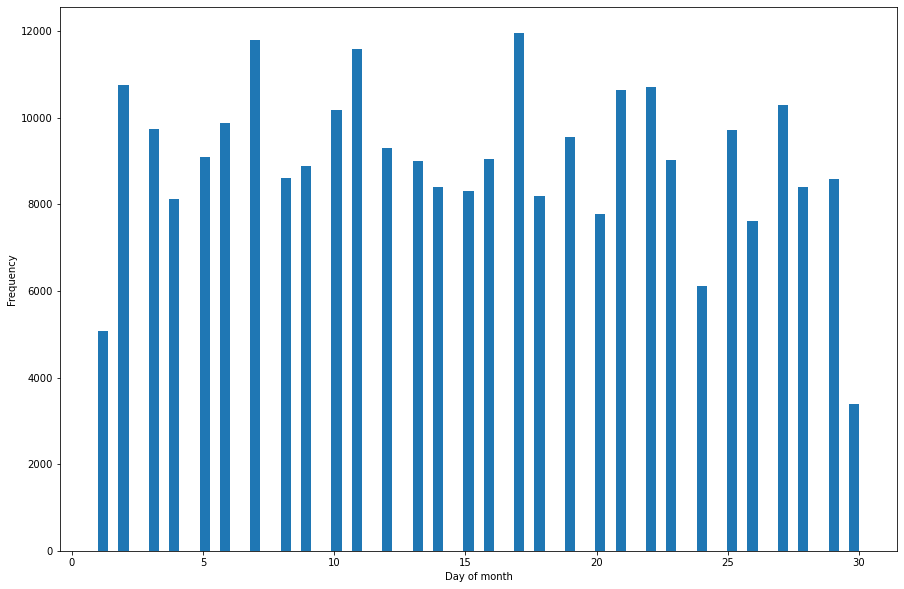

In [47]:
fig=plt.figure(figsize=(15,10))
df['day_of_month'].plot.hist(bins=75)
plt.xlabel('Day of month')

**Day Of Week**

<AxesSubplot:>

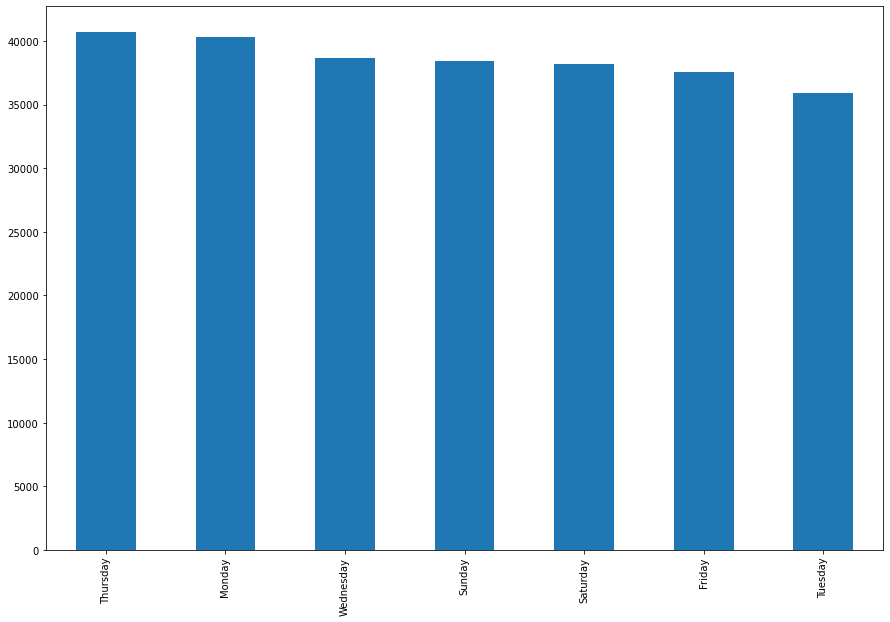

In [48]:
df_day_freq=df['the_day'].value_counts()
fig=plt.figure(figsize=(15, 10))
df_day_freq.plot.bar() 

### Top choices

**Top 10 First Choices in Products**

In [49]:
df['products'] = 'Products'
products = df.truncate(before = 605, after = 615)

products = nx.from_pandas_edgelist(products, source = 'products', target = 'product_name', edge_attr = True)

In [50]:
products

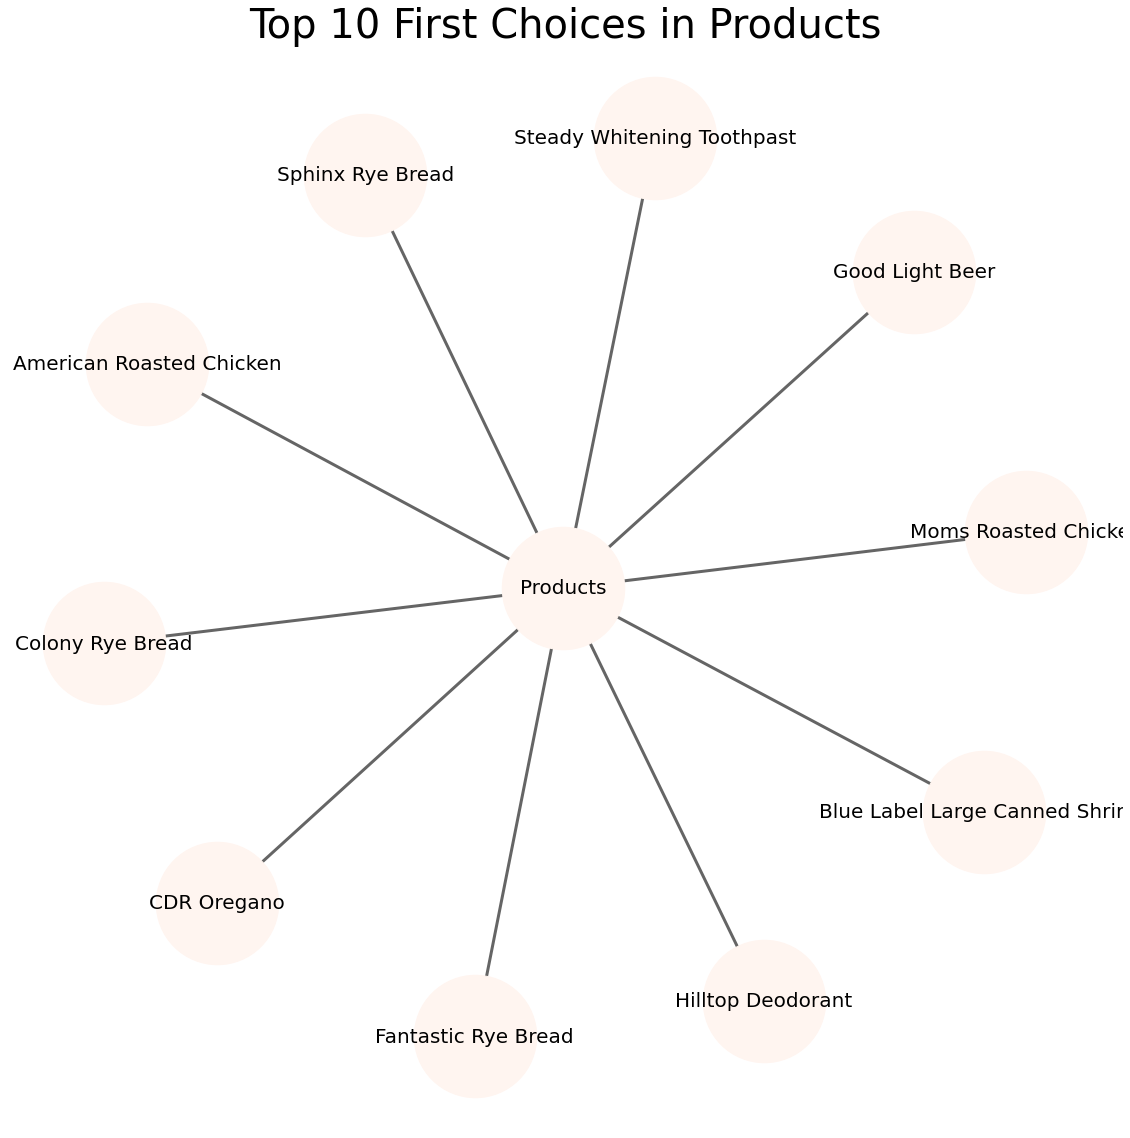

In [51]:
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=(20,20)
pos=nx.spring_layout(products)
color=plt.cm.Reds(np.linspace(0,15,1))
nx.draw_networkx_nodes(products,pos,node_size=15000,node_color=color)
nx.draw_networkx_edges(products, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(products, pos, font_size = 20)
plt.axis('off')
plt.grid()
plt.title('Top 10 First Choices in Products', fontsize = 40)
plt.show()

**Top 10 First Choices in Department**

In [52]:
df['departments'] = 'Departments'
departments = df.truncate(before = 150, after = 195)

departments = nx.from_pandas_edgelist(departments, source = 'departments', target = 'department', edge_attr = True)

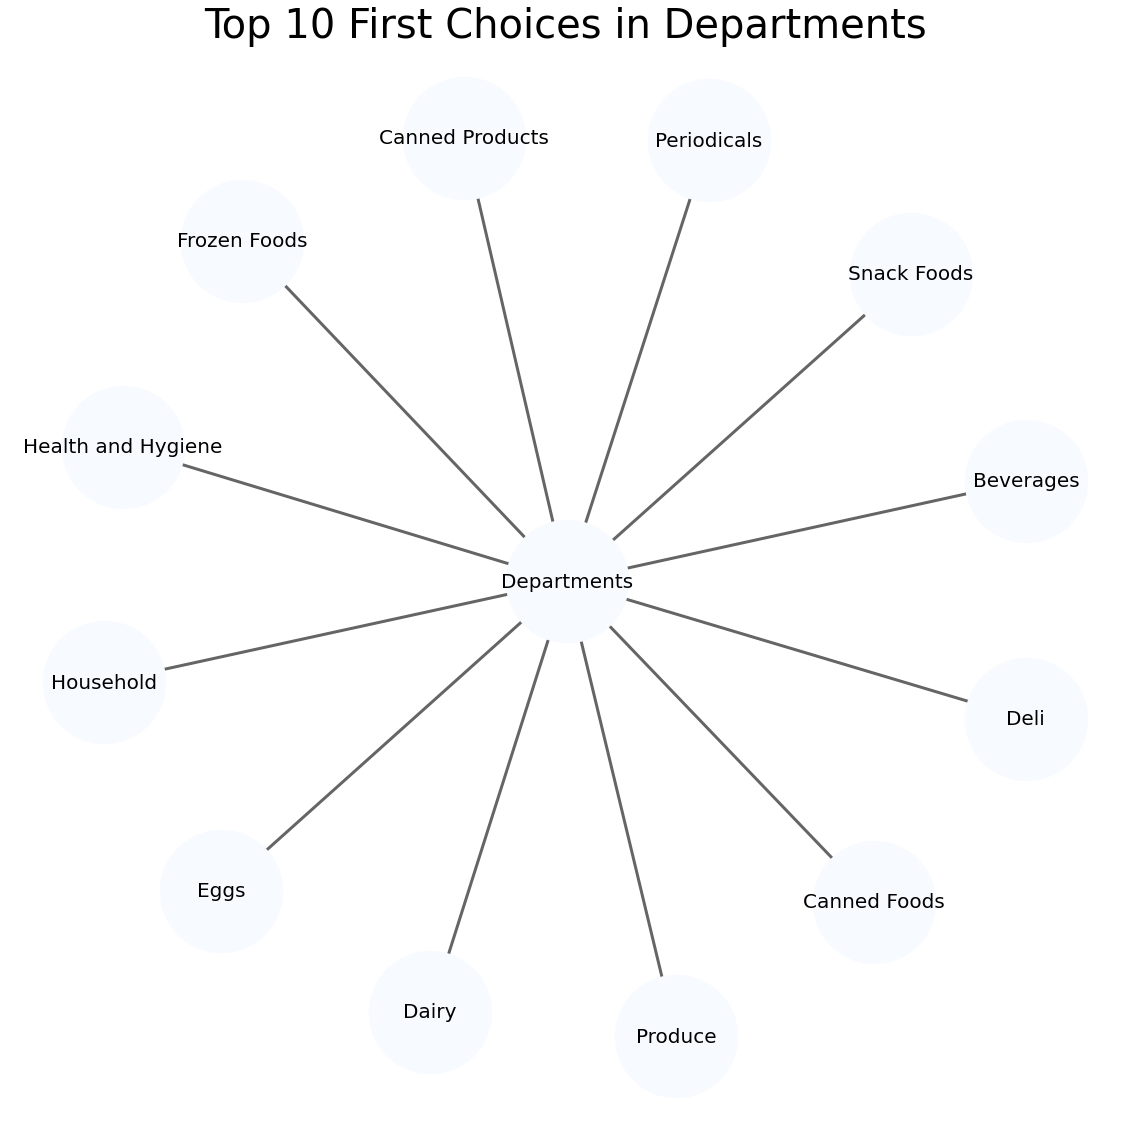

In [53]:
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=(20,20)
pos=nx.spring_layout(departments)
color=plt.cm.Blues(np.linspace(0,15,1))
nx.draw_networkx_nodes(departments,pos,node_size=15000,node_color=color)
nx.draw_networkx_edges(departments, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(departments, pos, font_size = 20)
plt.axis('off')
plt.grid()
plt.title('Top 10 First Choices in Departments', fontsize = 40)
plt.show()

**Highest Ordered**

**Most Ordered Products**

In [54]:
df['product_name'].value_counts()

Moms Roasted Chicken                           225
Tell Tale Fresh Lima Beans                     219
Steady Whitening Toothpast                     218
Hilltop Silky Smooth Hair Conditioner          216
Steady Childrens Cold Remedy                   214
                                              ... 
Faux Products Silky Smooth Hair Conditioner    132
Choice Bubble Gum                              129
CDR Oregano                                    124
Washington Berry Juice                          85
CDR Apple Preserves                             80
Name: product_name, Length: 1559, dtype: int64

**Most Ordered Products in Percentage**

In [55]:
df['product_name'].value_counts()/len(df)*100

Moms Roasted Chicken                           0.083420
Tell Tale Fresh Lima Beans                     0.081195
Steady Whitening Toothpast                     0.080825
Hilltop Silky Smooth Hair Conditioner          0.080083
Steady Childrens Cold Remedy                   0.079342
                                                 ...   
Faux Products Silky Smooth Hair Conditioner    0.048940
Choice Bubble Gum                              0.047827
CDR Oregano                                    0.045974
Washington Berry Juice                         0.031514
CDR Apple Preserves                            0.029660
Name: product_name, Length: 1559, dtype: float64

**Most Visited Departments**

In [56]:
df['department'].value_counts()

Produce                38041
Snack Foods            30983
Household              27590
Frozen Foods           27042
Baking Goods           20573
Canned Foods           19090
Dairy                  17195
Health and Hygiene     16643
Beverages              13624
Deli                   12130
Baked Goods             7951
Snacks                  6970
Alcoholic Beverages     6931
Starchy Foods           5198
Periodicals             4318
Eggs                    4099
Breakfast Foods         3462
Canned Products         1779
Meat                    1777
Checkout                1776
Seafood                 1688
Carousel                 860
Name: department, dtype: int64

**Most Visited Departments in Percentage**

In [57]:
df['department'].value_counts()/len(df)*100

Produce                14.103886
Snack Foods            11.487098
Household              10.229127
Frozen Foods           10.025953
Baking Goods            7.627540
Canned Foods            7.077710
Dairy                   6.375130
Health and Hygiene      6.170473
Beverages               5.051164
Deli                    4.497256
Baked Goods             2.947872
Snacks                  2.584161
Alcoholic Beverages     2.569702
Starchy Foods           1.927184
Periodicals             1.600919
Eggs                    1.519724
Breakfast Foods         1.283553
Canned Products         0.659573
Meat                    0.658831
Checkout                0.658461
Seafood                 0.625834
Carousel                0.318849
Name: department, dtype: float64

**Most Visited Aisle**

In [58]:
df['subcategory'].value_counts()

Fresh Vegetables     20859
Fresh Fruit          11972
Soup                  7919
Cheese                7815
Dried Fruit           7758
                     ...  
Pot Scrubbers          836
Pancakes               828
Fresh Fish             827
Sauces                 824
Fashion Magazines      824
Name: subcategory, Length: 102, dtype: int64

**Most Visited Aisle in Percentage**

In [59]:
df['subcategory'].value_counts()/len(df)*100

Fresh Vegetables     7.733576
Fresh Fruit          4.438677
Soup                 2.936008
Cheese               2.897449
Dried Fruit          2.876316
                       ...   
Pot Scrubbers        0.309951
Pancakes             0.306985
Fresh Fish           0.306614
Sauces               0.305502
Fashion Magazines    0.305502
Name: subcategory, Length: 102, dtype: float64

**BarPlot**

**BarPlot of Most Visied Aisle**

<AxesSubplot:>

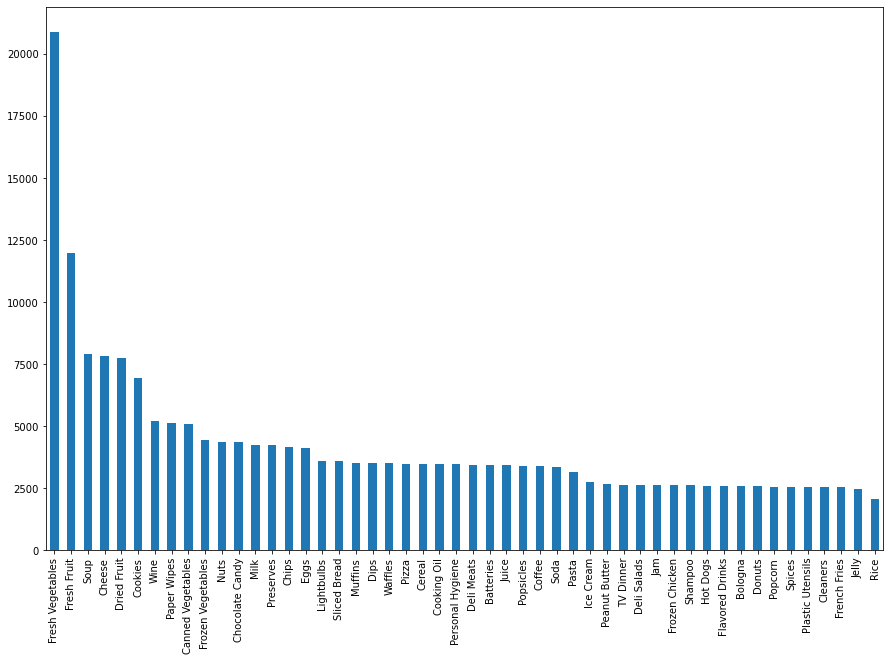

In [60]:
df_subcategory_freq=df['subcategory'].value_counts().iloc[:50]
fig=plt.figure(figsize=(15,10))
df_subcategory_freq.plot.bar()

**BarPlot of Most Visited Department**

<AxesSubplot:>

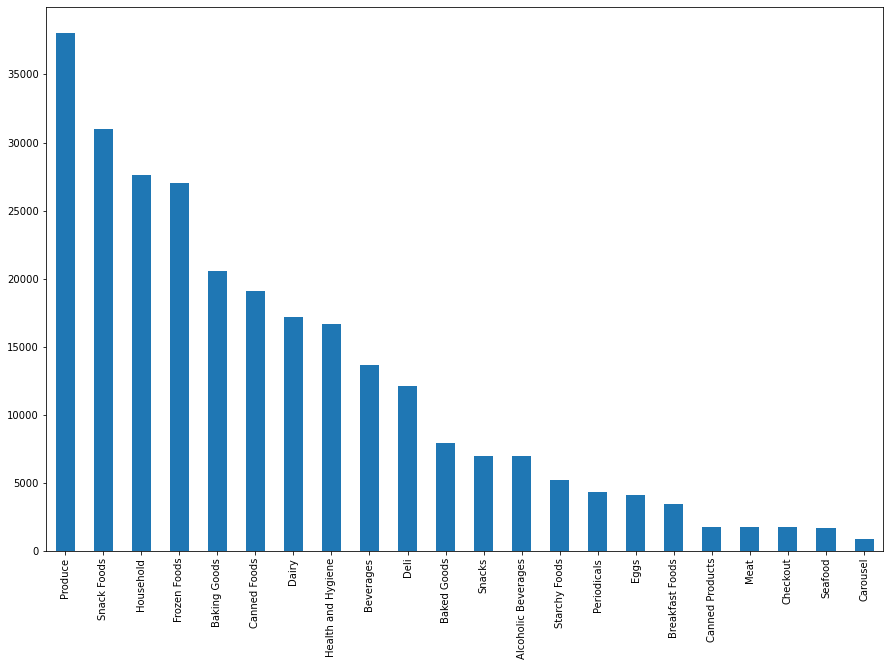

In [61]:
fig=plt.figure(figsize=(15,10))
df['department'].value_counts().plot(kind='bar')

**BarPlot of Most Bought Product**

<AxesSubplot:>

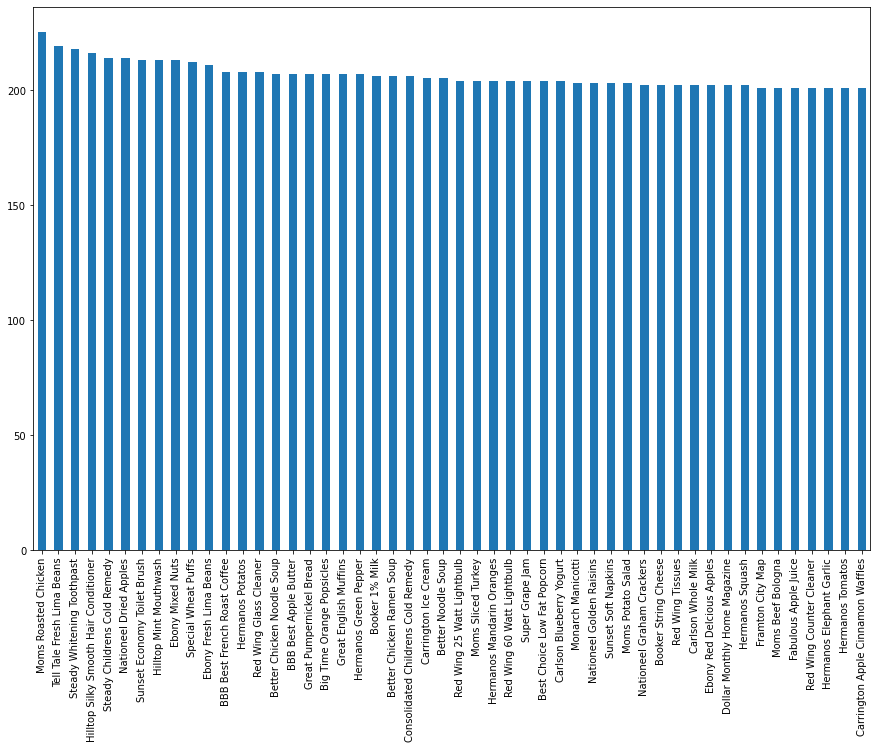

In [62]:
df_freq_products=df['product_name'].value_counts().iloc[:50]
fig=plt.figure(figsize=(15, 10))
df_freq_products.plot.bar() 

**Array of Most Bought Product**

In [63]:
y=df_freq_products.head(50).to_frame()
y.index

Index(['Moms Roasted Chicken', 'Tell Tale Fresh Lima Beans',
       'Steady Whitening Toothpast', 'Hilltop Silky Smooth Hair Conditioner',
       'Steady Childrens Cold Remedy', 'Nationeel Dried Apples',
       'Sunset Economy Toilet Brush', 'Hilltop Mint Mouthwash',
       'Ebony Mixed Nuts', 'Special Wheat Puffs', 'Ebony Fresh Lima Beans',
       'BBB Best French Roast Coffee', 'Hermanos Potatos',
       'Red Wing Glass Cleaner', 'Better Chicken Noodle Soup',
       'BBB Best Apple Butter', 'Great Pumpernickel Bread',
       'Big Time Orange Popsicles', 'Great English Muffins',
       'Hermanos Green Pepper', 'Booker 1% Milk', 'Better Chicken Ramen Soup',
       'Consolidated Childrens Cold Remedy', 'Carrington Ice Cream',
       'Better Noodle Soup', 'Red Wing 25 Watt Lightbulb',
       'Moms Sliced Turkey', 'Hermanos Mandarin Oranges',
       'Red Wing 60 Watt Lightbulb', 'Super Grape Jam',
       'Best Choice Low Fat Popcorn', 'Carlson Blueberry Yogurt',
       'Monarch Manicotti'

**TreeMap for Most Bought Products**

(0.0, 100.0, 0.0, 100.0)

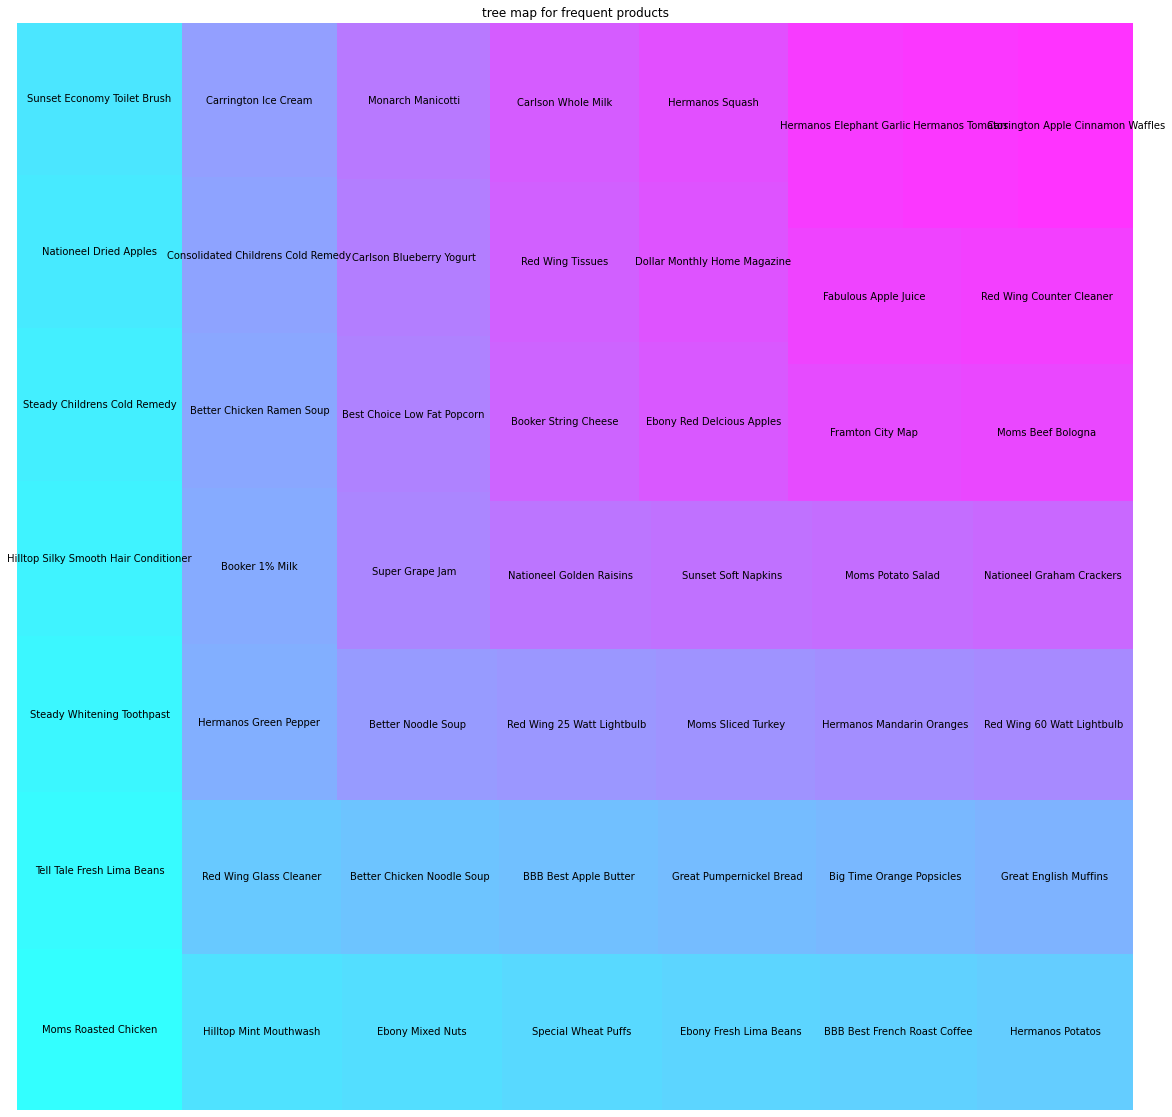

In [64]:
plt.rcParams['figure.figsize']=(20,20)
color=plt.cm.cool(np.linspace(0,1,50))
squarify.plot(sizes=y.values,label=y.index,alpha=0.8,color=color)
plt.title('tree map for frequent products')
plt.axis('off')

# Data Manipulation

In [65]:
df.shape

(269720, 77)

**Drop Duplicates**

In [66]:
df.drop_duplicates()

Unnamed: 0  product_id  time_id  customer_id  store_id  store_sales  \
0                0         337      371         6280         2         1.50   
1                1         963      371         4018         2         2.40   
2                2        1512      371         6280         2         1.62   
3                3         181      371         4018         2         2.79   
4                4         483      371         4382         2         3.88   
...            ...         ...      ...          ...       ...          ...   
269715      269715        1529      786          433        20         9.81   
269716      269716        1094      786         6094        20         7.54   
269717      269717         467      786         5352        20        15.24   
269718      269718         656      786         3332        20        11.55   
269719      269719          34      786         9114        20         8.45   

        store_cost  unit_sales           city state_province  ...  \
0           0.5100           2      Anacortes             WA  ...   
1           0.7200           1  Sedro Woolley             WA  ...   
2           0.6318           3      Anacortes             WA  ...   
3           1.0323           3  Sedro Woolley             WA  ...   
4           1.7072           2      Anacortes             WA  ...   
...            ...         ...            ...            ...  ...   
269715      3.3354           3        Oak Bay             BC  ...   
269716      3.4684           2          Sooke             BC  ...   
269717      5.1816           4        Shawnee             BC  ...   
269718      4.6200           3          Sooke             BC  ...   
269719      2.6195           5      Metchosin             BC  ...   

       sales_country  sales_district_id    the_date  the_day  the_year  \
0                USA                111  1997-01-05   Sunday      1997   
1                USA                111  1997-01-05   Sunday      1997   
2                USA                111  1997-01-05   Sunday      1997   
3                USA                111  1997-01-05   Sunday      1997   
4                USA                111  1997-01-05   Sunday      1997   
...              ...                ...         ...      ...       ...   
269715        Canada                129  1998-02-24  Tuesday      1998   
269716        Canada                129  1998-02-24  Tuesday      1998   
269717        Canada                129  1998-02-24  Tuesday      1998   
269718        Canada                129  1998-02-24  Tuesday      1998   
269719        Canada                129  1998-02-24  Tuesday      1998   

        the_month day_of_month day_since_epoch  products  departments  
0               1            5           33973  Products  Departments  
1               1            5           33973  Products  Departments  
2               1            5           33973  Products  Departments  
3               1            5           33973  Products  Departments  
4               1            5           33973  Products  Departments  
...           ...          ...             ...       ...          ...  
269715          2           24           34388  Products  Departments  
269716          2           24           34388  Products  Departments  
269717          2           24           34388  Products  Departments  
269718          2           24           34388  Products  Departments  
269719          2           24           34388  Products  Departments  

[269720 rows x 77 columns]

In [67]:
df.shape

(269720, 77)

**Missing Values**

In [68]:
df.isnull().sum()

Unnamed: 0         0
product_id         0
time_id            0
customer_id        0
store_id           0
                  ..
the_month          0
day_of_month       0
day_since_epoch    0
products           0
departments        0
Length: 77, dtype: int64

**Datatypes**

In [69]:
df.dtypes

Unnamed: 0          int64
product_id          int64
time_id             int64
customer_id         int64
store_id            int64
                    ...  
the_month           int64
day_of_month        int64
day_since_epoch     int64
products           object
departments        object
Length: 77, dtype: object

# Bivariate Analysis

**Bar Plot**

**Bar Plot between customers and their products per order**

In [70]:
data_user_orders_num=df.groupby('customer_id')['unit_sales'].count()
data_user_orders_num

customer_id
3        30
5         1
6        16
8        42
9        13
         ..
10275    22
10277    26
10278    28
10280    40
10281    22
Name: unit_sales, Length: 8842, dtype: int64

In [71]:
source_data = {}
for i in range(10):
    source_data[str(10*i)+'~'+str(10*(i+1))]=len([x for x in list(data_user_orders_num) if x>=i*10 and x<(i+1)*10])
    
source_data

{'0~10': 2145,
 '10~20': 2509,
 '20~30': 1510,
 '30~40': 760,
 '40~50': 454,
 '50~60': 276,
 '60~70': 244,
 '70~80': 175,
 '80~90': 160,
 '90~100': 110}

ValueError: Using a string of single character colors as a color sequence is not supported. The colors can be passed as an explicit list instead.

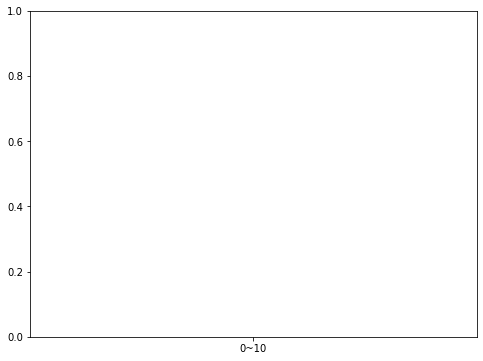

In [72]:
font_size=10
fig_size=(8,6)    
mpl.rcParams['font.size']=font_size
mpl.rcParams['figure.figsize']=fig_size
bar_width=0.3

 
x_axis = tuple(source_data.keys())
y_axis = tuple(source_data.values())
#assign color
plt.bar(x_axis, y_axis, color='rgb')  
# descrpitions for x-axis, y-axis
plt.xlabel('Unit sales')  
plt.ylabel("No. of customers") 
plt.title("Orders Scatter Plot") 
plt.show()

**Transaction ID** - create transaction id which denotes a basket

In [73]:
df['transaction_id'] = df['customer_id'].astype(str) + df['time_id'].astype(str)

In [74]:
df.head()

Unnamed: 0  product_id  time_id  customer_id  store_id  store_sales  \
0           0         337      371         6280         2         1.50   
1           1         963      371         4018         2         2.40   
2           2        1512      371         6280         2         1.62   
3           3         181      371         4018         2         2.79   
4           4         483      371         4382         2         3.88   

   store_cost  unit_sales           city state_province  ...  \
0      0.5100           2      Anacortes             WA  ...   
1      0.7200           1  Sedro Woolley             WA  ...   
2      0.6318           3      Anacortes             WA  ...   
3      1.0323           3  Sedro Woolley             WA  ...   
4      1.7072           2      Anacortes             WA  ...   

  sales_district_id    the_date the_day the_year  the_month  day_of_month  \
0               111  1997-01-05  Sunday     1997          1             5   
1               111  1997-01-05  Sunday     1997          1             5   
2               111  1997-01-05  Sunday     1997          1             5   
3               111  1997-01-05  Sunday     1997          1             5   
4               111  1997-01-05  Sunday     1997          1             5   

  day_since_epoch  products  departments transaction_id  
0           33973  Products  Departments        6280371  
1           33973  Products  Departments        4018371  
2           33973  Products  Departments        6280371  
3           33973  Products  Departments        4018371  
4           33973  Products  Departments        4382371  

[5 rows x 78 columns]

**Filtering out Columns**

In [75]:
cols = [77,3,1,24]
order_products=df[df.columns[cols]]

In [76]:
order_products.head()

transaction_id  customer_id  product_id                    product_name
0        6280371         6280         337       Better Turkey Noodle Soup
1        4018371         4018         963  Just Right Chicken Noodle Soup
2        6280371         6280        1512                Jardon Spaghetti
3        4018371         4018         181                High Top Lettuce
4        4382371         4382         483       Tell Tale Corn on the Cob

**Average products bought by customers per order**

In [77]:
data_user_products_num1=order_products.groupby('transaction_id')['product_id'].count()
data_user_products_num1=pd.DataFrame(data_user_products_num1)
data_user_products_num1['transaction_id']=list(data_user_products_num1.index)
data_user_products_num1.columns=['product_num','orderid']
data_user_products_num2=pd.merge(data_user_products_num1,df[['transaction_id','customer_id']],on='transaction_id',how='left')

data_user_products_num3=data_user_products_num2.groupby('customer_id')['product_num'].agg(['sum','count'])
data_user_products_num3['avg']=data_user_products_num3['sum']/data_user_products_num3['count']

In [78]:
data_user_products_num3.head()

sum  count       avg
customer_id                      
3            186     30  6.200000
5              1      1  1.000000
6             72     16  4.500000
8            208     42  4.952381
9             85     13  6.538462

# Featured Products Department Wise

In [79]:
cols = [1,36,38,24]
departments=df[df.columns[cols]]
departments.head()

product_id       subcategory     department                    product_name
0         337              Soup   Canned Foods       Better Turkey Noodle Soup
1         963              Soup   Canned Foods  Just Right Chicken Noodle Soup
2        1512             Pasta  Starchy Foods                Jardon Spaghetti
3         181  Fresh Vegetables        Produce                High Top Lettuce
4         483  Fresh Vegetables        Produce       Tell Tale Corn on the Cob

**List Of Departments**

In [80]:
temp=['department']
for i in temp:
    print('@@@@@@Value Count in',i,'@@@@@@@@@')
    print(df[i].value_counts())

@@@@@@Value Count in department @@@@@@@@@
Produce                38041
Snack Foods            30983
Household              27590
Frozen Foods           27042
Baking Goods           20573
Canned Foods           19090
Dairy                  17195
Health and Hygiene     16643
Beverages              13624
Deli                   12130
Baked Goods             7951
Snacks                  6970
Alcoholic Beverages     6931
Starchy Foods           5198
Periodicals             4318
Eggs                    4099
Breakfast Foods         3462
Canned Products         1779
Meat                    1777
Checkout                1776
Seafood                 1688
Carousel                 860
Name: department, dtype: int64


**Produce Department**

In [81]:
produce=departments.loc[df['department'] == 'Produce']
produce.head()

product_id       subcategory department               product_name
3          181  Fresh Vegetables    Produce           High Top Lettuce
4          483  Fresh Vegetables    Produce  Tell Tale Corn on the Cob
18        1123  Fresh Vegetables    Produce          Tri-State Potatos
19         804  Fresh Vegetables    Produce      Ebony Elephant Garlic
20        1426  Fresh Vegetables    Produce    Hermanos Prepared Salad

**Featured Products in Produce Department**

In [82]:
top_produce=produce['product_name'].value_counts().iloc[:10]
top_produce.head()

Tell Tale Fresh Lima Beans    219
Ebony Mixed Nuts              213
Ebony Fresh Lima Beans        211
Hermanos Potatos              208
Hermanos Green Pepper         207
Name: product_name, dtype: int64

**Featured Products in Snack Foods Department**

In [83]:
snacks=df.loc[df['department']=='Snack Foods']
top_snacks=snacks['product_name'].value_counts().iloc[:10]
top_snacks.head()

Nationeel Dried Apples         214
Best Choice Low Fat Popcorn    204
Nationeel Golden Raisins       203
Nationeel Graham Crackers      202
Nationeel Avocado Dip          198
Name: product_name, dtype: int64

**Featured Products in HouseHold Department**

In [84]:
household=df.loc[df['department']=='Household']
top_household=household['product_name'].value_counts().iloc[:10]
print(top_household)

Sunset Economy Toilet Brush    213
Red Wing Glass Cleaner         208
Red Wing 60 Watt Lightbulb     204
Red Wing 25 Watt Lightbulb     204
Sunset Soft Napkins            203
Red Wing Tissues               202
Sunset Paper Cups              201
Red Wing Counter Cleaner       201
Denny 60 Watt Lightbulb        200
Sunset Large Sponge            199
Name: product_name, dtype: int64


**Featured Products in Frozen Foods Department**

In [85]:
frozen=df.loc[df['department']=='Frozen Foods']
top_frozen=frozen['product_name'].value_counts().iloc[:10]
print(top_frozen)

Big Time Orange Popsicles            207
Carrington Ice Cream                 205
Big Time Chicken TV Dinner           201
Carrington Apple Cinnamon Waffles    201
Carrington Beef TV Dinner            200
Big Time Frozen Broccoli             200
Big Time Pancake Mix                 200
Big Time Frozen Cheese Pizza         199
Carrington Ice Cream Sandwich        198
Carrington Blueberry Waffles         197
Name: product_name, dtype: int64


**Featured Products in Baking Goods Department**

In [86]:
baking=df.loc[df['department']=='Baking Goods']
top_baking=baking['product_name'].value_counts().iloc[:10]
print(top_baking)

BBB Best Apple Butter               207
Super Grape Jam                     204
BBB Best Strawberry Jelly           198
Landslide Strawberry Jam            198
Super Strawberry Jelly              197
Super Chunky Peanut Butter          197
Super Creamy Peanut Butter          197
Super Extra Chunky Peanut Butter    195
BBB Best Apple Preserves            192
Super Salt                          191
Name: product_name, dtype: int64


**Featured Products in Canned Foods Department**

In [87]:
canned=df.loc[df['department']=='Canned Foods']
top_canned=canned['product_name'].value_counts().iloc[:10]
print(top_canned)

Better Chicken Noodle Soup       207
Better Chicken Ramen Soup        206
Better Noodle Soup               205
Better Fancy Canned Clams        199
Better Canned Tuna in Oil        198
Better Fancy Canned Anchovies    198
Just Right Turkey Noodle Soup    197
Just Right Chicken Ramen Soup    197
Just Right Rice Soup             196
Better Canned Tuna in Water      195
Name: product_name, dtype: int64


**Featured Products in Dairy Department**

In [88]:
dairy=(df.loc[df['department'] == 'Dairy'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

Booker 1% Milk                   206
Carlson Blueberry Yogurt         204
Carlson Whole Milk               202
Booker String Cheese             202
Carlson Head Cheese              201
Carlson Buttermilk               199
Carlson Low Fat String Cheese    199
Carlson Jack Cheese              198
Carlson Havarti Cheese           197
Carlson 1% Milk                  196
Name: product_name, dtype: int64


**Featured Products in Health and Hygiene Department**

In [89]:
dairy=(df.loc[df['department'] == 'Health and Hygiene'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

Steady Whitening Toothpast               218
Hilltop Silky Smooth Hair Conditioner    216
Steady Childrens Cold Remedy             214
Hilltop Mint Mouthwash                   213
Consolidated Childrens Cold Remedy       206
Steady 200 MG Ibuprofen                  200
Bird Call 200 MG Acetominifen            198
Steady 200 MG Acetominifen               198
Hilltop Deodorant                        197
Hilltop Extra Moisture Shampoo           197
Name: product_name, dtype: int64


**Featured Products in Beverages Department**

In [90]:
dairy=(df.loc[df['department'] == 'Beverages'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

BBB Best French Roast Coffee    208
Fabulous Apple Juice            201
Fabulous Orange Juice           200
Fabulous Cranberry Juice        199
Skinner Strawberry Drink        198
Token Diet Cola                 195
Excellent Mango Drink           195
BBB Best Decaf Coffee           195
Excellent Cream Soda            192
Fabulous Strawberry Drink       191
Name: product_name, dtype: int64


**Featured Products in Deli Department**

In [91]:
dairy=(df.loc[df['department'] == 'Deli'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

Moms Roasted Chicken       225
Moms Sliced Turkey         204
Moms Potato Salad          203
Moms Beef Bologna          201
Moms Foot-Long Hot Dogs    196
American Sliced Ham        195
Moms Low Fat Cole Slaw     195
Moms Chicken Hot Dogs      195
Moms Pimento Loaf          192
Moms Turkey Hot Dogs       190
Name: product_name, dtype: int64


**Featured Products in Alcoholic Beverages Department**

In [92]:
dairy=(df.loc[df['department'] == 'Alcoholic Beverages'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

Pearl Chablis Wine                  197
Good Imported Beer                  193
Pearl Chardonnay Wine               193
Pearl Light Beer                    191
Good Chablis Wine                   189
Pearl White Zinfandel Wine          189
Top Measure White Zinfandel Wine    187
Pearl Imported Beer                 187
Pearl Chardonnay                    185
Pearl Merlot Wine                   185
Name: product_name, dtype: int64


**Featured Products in Starchy Foods Department**

In [93]:
dairy=(df.loc[df['department'] == 'Starchy Foods'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

Monarch Manicotti        203
Monarch Rice Medly       199
Colossal Manicotti       188
Medalist Thai Rice       186
Shady Lake Rice Medly    186
Shady Lake Ravioli       185
Colossal Ravioli         185
Discover Manicotti       183
Monarch Spaghetti        183
Discover Rice Medly      178
Name: product_name, dtype: int64


**Featured Products in Eggs Department**

In [94]:
dairy=(df.loc[df['department'] == 'Eggs'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

Urban Large Brown Eggs         194
Urban Small Brown Eggs         189
National Large Eggs            187
Urban Egg Substitute           186
Urban Small Eggs               175
Urban Large Eggs               174
Giant Large Eggs               170
Giant Small Eggs               168
Blue Medal Small Eggs          167
Blue Medal Large Brown Eggs    166
Name: product_name, dtype: int64


# Market Basket Analysis

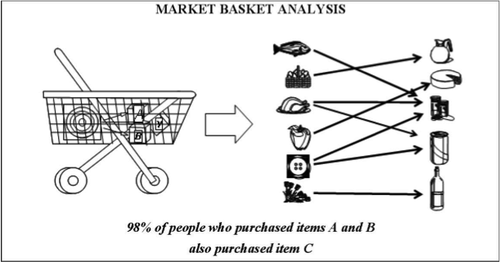

**Importing Libraries**

In [95]:
import pandas as pd 
import numpy as np 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

**Filtering the Columns**

In [96]:
cols = [77,3,1,24,7,2]
product_name=df[df.columns[cols]]

In [97]:
product_name.head()

transaction_id  customer_id  product_id                    product_name  \
0        6280371         6280         337       Better Turkey Noodle Soup   
1        4018371         4018         963  Just Right Chicken Noodle Soup   
2        6280371         6280        1512                Jardon Spaghetti   
3        4018371         4018         181                High Top Lettuce   
4        4382371         4382         483       Tell Tale Corn on the Cob   

   unit_sales  time_id  
0           2      371  
1           1      371  
2           3      371  
3           3      371  
4           2      371

**Counting each product** The number of transactions a product appeared in

In [98]:
productCountDf = product_name.groupby("product_id",as_index = False)['transaction_id'].count()

In [99]:
productCountDf.head()

product_id  transaction_id
0           1              85
1           2             155
2           3             148
3           4             154
4           5             144

**Arranging Top Products**

In [100]:
productCountDf = productCountDf.sort_values("transaction_id",ascending = False)

In [101]:
productCountDf.head()

product_id  transaction_id
381          382             225
501          502             219
425          426             218
1361        1362             216
864          865             214

**Top 100 most frequently purchased products**

In [102]:
topProdFrame = productCountDf.iloc[0:100,:]
productId= topProdFrame.loc[:,["product_id"]]

In [103]:
topProdFrame

product_id  transaction_id
381          382             225
501          502             219
425          426             218
1361        1362             216
864          865             214
...          ...             ...
963          964             197
445          446             197
1391        1392             197
1372        1373             197
1336        1337             197

[100 rows x 2 columns]

**Orders containting the the most frequently purchased products**

In [104]:
MarketBasketdf = product_name[0:0]
for i in range(0,99):
    pId = productId.iloc[i]['product_id'] 
    stDf = product_name[product_name.product_id == pId ]
    MarketBasketdf = MarketBasketdf.append(stDf,ignore_index = False)

In [105]:
MarketBasketdf.head()

transaction_id  customer_id  product_id          product_name  \
609         2808742         2808         382  Moms Roasted Chicken   
1981          76462           76         382  Moms Roasted Chicken   
3528        3261062          326         382  Moms Roasted Chicken   
3680       21731062         2173         382  Moms Roasted Chicken   
4290         630679          630         382  Moms Roasted Chicken   

      unit_sales  time_id  
609            3      742  
1981           3      462  
3528           1     1062  
3680           4     1062  
4290           2      679

**Putting the items into 1 transaction**

In [106]:
basket = MarketBasketdf.groupby(['transaction_id','product_name'])['unit_sales'].sum().unstack().reset_index().fillna(0).set_index('transaction_id')

In [107]:
basket.head()

product_name    ADJ Rosy Sunglasses  BBB Best Apple Butter  \
transaction_id                                               
10000850                        0.0                    0.0   
10000872                        0.0                    0.0   
10000903                        0.0                    0.0   
100011011                       0.0                    0.0   
10001793                        2.0                    0.0   

product_name    BBB Best French Roast Coffee  BBB Best Strawberry Jelly  \
transaction_id                                                            
10000850                                 0.0                        0.0   
10000872                                 0.0                        0.0   
10000903                                 0.0                        0.0   
100011011                                4.0                        0.0   
10001793                                 0.0                        0.0   

product_name    Best Choice Low Fat Popcorn  Better Canned Tuna in Oil  \
transaction_id                                                           
10000850                                0.0                        0.0   
10000872                                0.0                        0.0   
10000903                                0.0                        0.0   
100011011                               0.0                        0.0   
10001793                                0.0                        0.0   

product_name    Better Chicken Noodle Soup  Better Chicken Ramen Soup  \
transaction_id                                                          
10000850                               0.0                        0.0   
10000872                               0.0                        0.0   
10000903                               0.0                        0.0   
100011011                              0.0                        0.0   
10001793                               3.0                        0.0   

product_name    Better Fancy Canned Anchovies  Better Fancy Canned Clams  ...  \
transaction_id                                                            ...   
10000850                                  0.0                        0.0  ...   
10000872                                  0.0                        0.0  ...   
10000903                                  0.0                        0.0  ...   
100011011                                 0.0                        0.0  ...   
10001793                                  0.0                        0.0  ...   

product_name    Sunset Paper Cups  Sunset Paper Plates  Sunset Soft Napkins  \
transaction_id                                                                
10000850                      0.0                  0.0                  0.0   
10000872                      0.0                  0.0                  0.0   
10000903                      0.0                  0.0                  0.0   
100011011                     0.0                  0.0                  0.0   
10001793                      0.0                  0.0                  0.0   

product_name    Super Grape Jam  Super Strawberry Jelly  \
transaction_id                                            
10000850                    0.0                     0.0   
10000872                    0.0                     0.0   
10000903                    0.0                     0.0   
100011011                   0.0                     0.0   
10001793                    0.0                     0.0   

product_name    Tell Tale Fresh Lima Beans  Tell Tale Lettuce  \
transaction_id                                                  
10000850                               0.0                0.0   
10000872                               0.0                0.0   
10000903                               0.0                0.0   
100011011                              0.0                0.0   
10001793                               0.0                0.0   

product_name    

# One Hot Encoding

**Converted the units into 1 encoded value**

In [108]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1  

In [109]:
basket_sets = basket.applymap(encode_units)

In [110]:
basket_sets.head()

product_name    ADJ Rosy Sunglasses  BBB Best Apple Butter  \
transaction_id                                               
10000850                          0                      0   
10000872                          0                      0   
10000903                          0                      0   
100011011                         0                      0   
10001793                          1                      0   

product_name    BBB Best French Roast Coffee  BBB Best Strawberry Jelly  \
transaction_id                                                            
10000850                                   0                          0   
10000872                                   0                          0   
10000903                                   0                          0   
100011011                                  1                          0   
10001793                                   0                          0   

product_name    Best Choice Low Fat Popcorn  Better Canned Tuna in Oil  \
transaction_id                                                           
10000850                                  0                          0   
10000872                                  0                          0   
10000903                                  0                          0   
100011011                                 0                          0   
10001793                                  0                          0   

product_name    Better Chicken Noodle Soup  Better Chicken Ramen Soup  \
transaction_id                                                          
10000850                                 0                          0   
10000872                                 0                          0   
10000903                                 0                          0   
100011011                                0                          0   
10001793                                 1                          0   

product_name    Better Fancy Canned Anchovies  Better Fancy Canned Clams  ...  \
transaction_id                                                            ...   
10000850                                    0                          0  ...   
10000872                                    0                          0  ...   
10000903                                    0                          0  ...   
100011011                                   0                          0  ...   
10001793                                    0                          0  ...   

product_name    Sunset Paper Cups  Sunset Paper Plates  Sunset Soft Napkins  \
transaction_id                                                                
10000850                        0                    0                    0   
10000872                        0                    0                    0   
10000903                        0                    0                    0   
100011011                       0                    0                    0   
10001793                        0                    0                    0   

product_name    Super Grape Jam  Super Strawberry Jelly  \
transaction_id                                            
10000850                      0                       0   
10000872                      0                       0   
10000903                      0                       0   
100011011                     0                       0   
10001793                      0                       0   

product_name    Tell Tale Fresh Lima Beans  Tell Tale Lettuce  \
transaction_id                                                  
10000850                                 0                  0   
10000872                                 0                  0   
10000903                                 0                  0   
100011011                                0                  0   
10001793                                 0                  0   

product_name    

**Size and shape of basket**

In [111]:
basket_sets.size

1675971

In [112]:
basket_sets.shape

(16929, 99)

In [113]:
dummy=basket_sets.head(10000)

# Apriori Algorithm

**Importing Apriori and Association rules Libraries**

In [114]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

**Frequent items with support 0.01% using Apriori Algorithm**

In [115]:
frequent_itemsets = apriori(dummy, min_support=0.0001, use_colnames=True)

MemoryError: Unable to allocate 405. MiB for an array with shape (10000, 42454) and data type bool

In [132]:
small_dummy= dummy.sample(frac=0.8, random_state=1)
frequent_itemsets = apriori(small_dummy, min_support=0.0001, use_colnames=True, low_memory=True)

In [133]:
frequent_itemsets

support                                           itemsets
0     0.010500                              (ADJ Rosy Sunglasses)
1     0.011625                            (BBB Best Apple Butter)
2     0.011000                     (BBB Best French Roast Coffee)
3     0.012000                        (BBB Best Strawberry Jelly)
4     0.011750                      (Best Choice Low Fat Popcorn)
...        ...                                                ...
1436  0.000125  (Ebony Red Delcious Apples, Red Wing Tissues, ...
1437  0.000125  (Ebony Squash, Super Grape Jam, Great English ...
1438  0.000125  (Red Wing 60 Watt Lightbulb, Red Wing Counter ...
1439  0.000125  (Red Wing Counter Cleaner, Hermanos Squash, Na...
1440  0.000125  (Red Wing Tissues, Ebony Squash, Great English...

[1441 rows x 2 columns]

In [134]:
print(frequent_itemsets.to_string())

       support                                                                                                           itemsets
0     0.010500                                                                                              (ADJ Rosy Sunglasses)
1     0.011625                                                                                            (BBB Best Apple Butter)
2     0.011000                                                                                     (BBB Best French Roast Coffee)
3     0.012000                                                                                        (BBB Best Strawberry Jelly)
4     0.011750                                                                                      (Best Choice Low Fat Popcorn)
5     0.011625                                                                                        (Better Canned Tuna in Oil)
6     0.012375                                                                            

**Association rules using Apriori Algorithm**

In [135]:
apriori_rules = association_rules(frequent_itemsets, metric="lift", min_threshold= 1)

In [136]:
apriori_rules.head()

antecedents                  consequents  \
0        (ADJ Rosy Sunglasses)  (Better Chicken Ramen Soup)   
1  (Better Chicken Ramen Soup)        (ADJ Rosy Sunglasses)   
2        (ADJ Rosy Sunglasses)  (Better Fancy Canned Clams)   
3  (Better Fancy Canned Clams)        (ADJ Rosy Sunglasses)   
4        (ADJ Rosy Sunglasses)   (Big Time Frozen Broccoli)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.010500            0.011875  0.000125    0.011905  1.002506   
1            0.011875            0.010500  0.000125    0.010526  1.002506   
2            0.010500            0.011750  0.000250    0.023810  2.026342   
3            0.011750            0.010500  0.000250    0.021277  2.026342   
4            0.010500            0.010375  0.000375    0.035714  3.442341   

       leverage  conviction  
0  3.125000e-07    1.000030  
1  3.125000e-07    1.000027  
2  1.266250e-04    1.012354  
3  1.266250e-04    1.011011  
4  2.660625e-04    1.026278

**Filtering out co-realted products with higher Probability**

In [137]:
apriori_rules[ (apriori_rules['lift'] >= 50) & (apriori_rules['confidence'] >= 0.01) ].head()

antecedents  \
936           (ADJ Rosy Sunglasses, Moms Potato Salad)   
937  (ADJ Rosy Sunglasses, Better Chicken Noodle Soup)   
938    (Moms Potato Salad, Better Chicken Noodle Soup)   
939                              (ADJ Rosy Sunglasses)   
940                                (Moms Potato Salad)   

                                           consequents  antecedent support  \
936                       (Better Chicken Noodle Soup)            0.000125   
937                                (Moms Potato Salad)            0.000125   
938                              (ADJ Rosy Sunglasses)            0.000125   
939    (Moms Potato Salad, Better Chicken Noodle Soup)            0.010500   
940  (ADJ Rosy Sunglasses, Better Chicken Noodle Soup)            0.012500   

     consequent support   support  confidence       lift  leverage  conviction  
936            0.012375  0.000125    1.000000  80.808081  0.000123         inf  
937            0.012500  0.000125    1.000000  80.000000  0.000123         inf  
938            0.010500  0.000125    1.000000  95.238095  0.000124         inf  
939            0.000125  0.000125    0.011905  95.238095  0.000124    1.011922  
940            0.000125  0.000125    0.010000  80.000000  0.000123    1.009975

# Recommendations using Apriori Algorithm

In [141]:
def recommendations_using_Apriori(item):
    recommend = []
    for i in range(0,apriori_rules.shape[0]):
        if item == apriori_rules.iloc[i,0]:
            recommend.append(apriori_rules.iloc[i,1])
    
    return recommend

**5 Recommendations with Better Chicken Noodle Soup**

In [142]:
product_name = {'Better Chicken Noodle Soup'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:5], sep = "\n")

frozenset({'Better Chicken Ramen Soup'})
frozenset({'Carlson Blueberry Yogurt'})
frozenset({'Hermanos Green Pepper'})
frozenset({'Red Wing Plastic Knives'})
frozenset({'Special Wheat Puffs'})


**10 Recommendations with Moms Potato Salad**

In [143]:
product_name = {'Moms Potato Salad'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:10], sep = "\n")

frozenset({'Big Time Frozen Cheese Pizza'})
frozenset({'Great Pumpernickel Bread'})
frozenset({'Hilltop Extra Moisture Shampoo'})
frozenset({'Hilltop Silky Smooth Hair Conditioner'})
frozenset({'Moms Roasted Chicken'})
frozenset({'Nationeel Grape Fruit Roll'})
frozenset({'Red Wing 60 Watt Lightbulb'})
frozenset({'ADJ Rosy Sunglasses', 'Better Chicken Noodle Soup'})
frozenset({'Special Wheat Puffs', 'ADJ Rosy Sunglasses'})
frozenset({'Better Canned Tuna in Oil', 'Denny 60 Watt Lightbulb'})


**15 Recommendations with Carrington Ice Cream Sandwich**

In [144]:
product_name = {'Carrington Ice Cream Sandwich'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:15], sep = "\n")

frozenset({'Better Fancy Canned Anchovies'})
frozenset({'Fabulous Cranberry Juice'})
frozenset({'Great English Muffins'})
frozenset({'Hermanos Tomatos'})
frozenset({'Just Right Turkey Noodle Soup'})
frozenset({'Monarch Rice Medly'})
frozenset({'Sunset Economy Toilet Brush'})
frozenset({'Better Canned Tuna in Oil', 'Just Right Turkey Noodle Soup'})
frozenset({'Fabulous Apple Juice', 'Better Fancy Canned Anchovies'})
frozenset({'Fabulous Cranberry Juice', 'Better Fancy Canned Anchovies'})
frozenset({'Framton City Map', 'Booker 1% Milk'})
frozenset({'Steady Childrens Cold Remedy', 'Carlson Jack Cheese'})
frozenset({'Carrington Beef TV Dinner', 'Denny 60 Watt Lightbulb'})


# Fpgrowth Algorithm

**Importing Fpgrowth Libraries**

In [145]:
from mlxtend.frequent_patterns import fpgrowth

**Frequent Items with support 0.001% using Fpgrowth Algorithm**

In [147]:
# freq_items=fpgrowth(dummy,min_support=.0001,use_colnames=True)
freq_items=fpgrowth(small_dummy,min_support=.0001,use_colnames=True)

In [148]:
freq_items.head()

support                        itemsets
0  0.012125     (Big Time Orange Popsicles)
1  0.012625            (Moms Sliced Turkey)
2  0.011000  (Thresher White Chocolate Bar)
3  0.012125         (Nationeel Avocado Dip)
4  0.012000      (Hermanos Elephant Garlic)

**Association Rules using Fpgrowth Algorithm**

In [149]:
fpgrowth_rules=association_rules(freq_items,metric="lift",min_threshold=1)

In [150]:
fpgrowth_rules.head()

antecedents  \
0                        (Big Time Orange Popsicles)   
1                             (Big Time Pancake Mix)   
2  (Big Time Orange Popsicles, Carlson Low Fat St...   
3  (Big Time Orange Popsicles, Big Time Pancake Mix)   
4  (Carlson Low Fat String Cheese, Big Time Panca...   

                       consequents  antecedent support  consequent support  \
0           (Big Time Pancake Mix)            0.012125            0.013375   
1      (Big Time Orange Popsicles)            0.013375            0.012125   
2           (Big Time Pancake Mix)            0.000125            0.013375   
3  (Carlson Low Fat String Cheese)            0.000375            0.013375   
4      (Big Time Orange Popsicles)            0.000500            0.012125   

    support  confidence       lift  leverage  conviction  
0  0.000375    0.030928   2.312361  0.000213    1.018113  
1  0.000375    0.028037   2.312361  0.000213    1.016371  
2  0.000125    1.000000  74.766355  0.000123         inf  
3  0.000125    0.333333  24.922118  0.000120    1.479937  
4  0.000125    0.250000  20.618557  0.000119    1.317167

# Recommendations using Fpgrowth Algorithm

In [156]:
def recommendations_using_Fpgrowth(item):
    recommend = []
    for i in range(0,fpgrowth_rules.shape[0]):
        if item == fpgrowth_rules.iloc[i,0]:
            recommend.append(fpgrowth_rules.iloc[i,1])
    
    return recommend

**5 Recommendations with Better Chicken Noodle Soup**

In [157]:
product_name = {'Better Chicken Noodle Soup'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:5], sep = "\n")

frozenset({'Moms Sliced Turkey', 'Landslide Strawberry Jam'})
frozenset({'Tell Tale Lettuce', 'Landslide Strawberry Jam'})
frozenset({'Tell Tale Lettuce', 'Moms Sliced Turkey', 'Landslide Strawberry Jam'})
frozenset({'Carlson Blueberry Yogurt'})
frozenset({'Red Wing Plastic Knives', 'Carlson Blueberry Yogurt'})


**10 Recommendations with Moms Potato Salad**

In [158]:
product_name = {'Moms Potato Salad'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:10], sep = "\n")

frozenset({'Better Canned Tuna in Oil', 'Denny 60 Watt Lightbulb'})
frozenset({'Big Time Frozen Cheese Pizza', 'Fabulous Orange Juice'})
frozenset({'Hilltop Extra Moisture Shampoo'})
frozenset({'Red Wing 60 Watt Lightbulb', 'Hilltop Extra Moisture Shampoo'})
frozenset({'Red Wing Tissues', 'Great Pumpernickel Bread'})
frozenset({'Special Wheat Puffs', 'Better Chicken Noodle Soup'})
frozenset({'Big Time Frozen Cheese Pizza'})
frozenset({'Great Pumpernickel Bread'})
frozenset({'Red Wing 60 Watt Lightbulb'})
frozenset({'Hilltop Silky Smooth Hair Conditioner'})


**15 Recommendations with Carrington Ice Cream Sandwich**

In [159]:
product_name = {'Carrington Ice Cream Sandwich'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:15], sep = "\n")

frozenset({'Sunset Economy Toilet Brush'})
frozenset({'Great English Muffins'})
frozenset({'Better Fancy Canned Anchovies'})
frozenset({'Steady Childrens Cold Remedy', 'Carlson Jack Cheese'})
frozenset({'Fabulous Cranberry Juice'})
frozenset({'Fabulous Cranberry Juice', 'Better Fancy Canned Anchovies'})
frozenset({'Framton City Map', 'Booker 1% Milk'})
frozenset({'Just Right Turkey Noodle Soup'})
frozenset({'Better Canned Tuna in Oil', 'Just Right Turkey Noodle Soup'})
frozenset({'Carrington Beef TV Dinner', 'Denny 60 Watt Lightbulb'})
frozenset({'Fabulous Apple Juice', 'Better Fancy Canned Anchovies'})
frozenset({'Hermanos Tomatos'})
frozenset({'Monarch Rice Medly'})


# Apriori VS fpgrowth Algorithm

**Calculating Run Time of Apriori Algorithm**

In [160]:
import time
l=[0.01,0.02,0.03,0.04,0.05]
t=[]
for i in l:
    t1=time.time()
    apriori(dummy,min_support=i,use_colnames=True)
    t2=time.time()
    t.append((t2-t1)*1000)

**Calculating Run Time of Fpgrowth Algorithm**

In [161]:
l=[0.01,0.02,0.03,0.04,0.05]
f=[]
for i in l:
    t1=time.time()
    fpgrowth(dummy,min_support=i,use_colnames=True)
    t2=time.time()
    f.append((t2-t1)*1000)

**Graph of Run Time between Apriori and Fpgrowth Algorithm**

Text(0, 0.5, 'Run Time in ms')

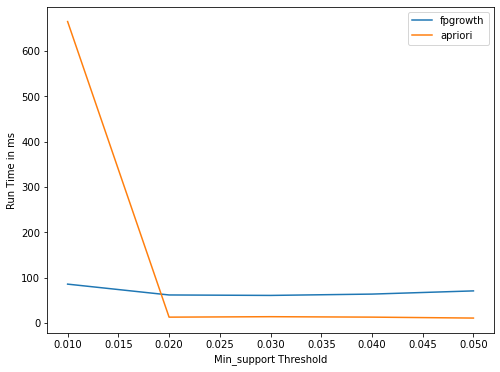

In [ ]:
sns.lineplot(x=l,y=f,label="fpgrowth")
sns.lineplot(x=l,y=t,label="apriori")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")

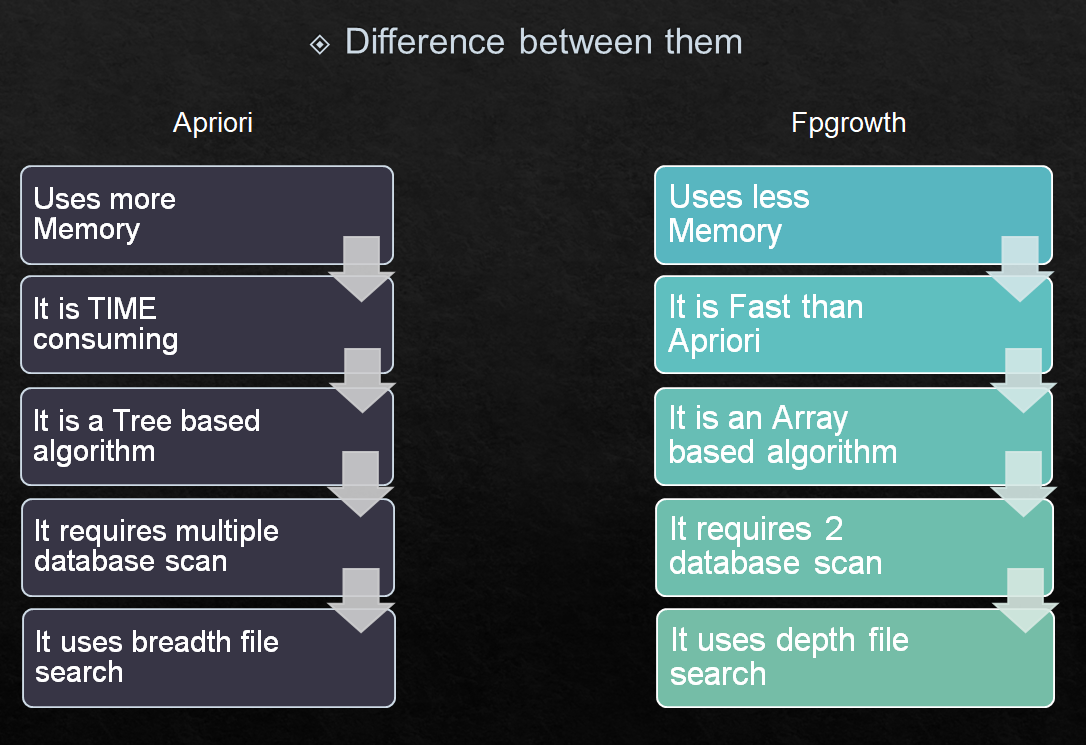